In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from sklearn.preprocessing import normalize

In [200]:
def readData():   
    import numpy as np
   
    data = pd.read_csv('PseudoGASelected1.csv', index_col = [0])
    metadata = pd.read_csv('ShalekCellMeta.csv', index_col = [0])
    data_temp = data.copy()
    #data = pd.read_csv('selectedGenes_Marques1.csv', index_col = [0])
    df = pd.DataFrame(data)
    
    colsums = df.sum(axis=0)
    #print(colsums)
    normalized = df.div(colsums)

#     data.apply(np., axis = 1)
#     dfIni.loc[i+1] = normalize([arr1], norm="max") 
    
    #print(array, "_", colsums)
    #print(normalized.shape)
    data1 = normalized
    #data1 = np.transpose(normalized)
    return data, data1, metadata

In [323]:
data, normalized_data, metadata = readData()
#metadata.head()
#data = np.transpose(data)
#print(data.head())
array1 = np.arange(1, 437+1, 1)
#data.columns = array1
#data=data.drop(data.columns[306],axis = 1)
#print(data.shape)
typeofCells  = [1, 1, 1, 2 ,2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5 ,6 ,6 ,
6, 6 ,6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7,
7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]
typeofCells = np.array(typeofCells)*2
actual_capture_time = metadata['capture'].values
actual_capture_time = metadata['obstime'].values
#print(actual_capture_time)
actual_capture_time = typeofCells
unique = set(actual_capture_time)
from collections import Counter

count_array = Counter(actual_capture_time) 
unique = list(unique)

#print(unique)

#unique = list(np.asarray(unique) *2)
# unique[0] = 1
unique = sorted(unique, reverse=False)
unique[6] = 16
#unique[5] = 14
print(unique)
#count_array[1] = 74
print(type(count_array))

[2, 4, 6, 8, 10, 12, 16]
<class 'collections.Counter'>


In [324]:
def data_manipulation(data, unique):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    from sklearn.preprocessing import normalize
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    
    
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
            normDist.loc[k] =  normal(loc=unique[k-1], scale=2, size=200)
    
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):
            if(unique[j] == 16):
                cTime = 14
#             elif(unique[j] == 14):
#                 cTime = 12
            else:
                cTime = unique[j]
            arr = poisson.rvs(mu=unique[j], size=count_array[cTime])
#             if(unique[j] == 1):
#                 cTime = 0
#             else:
#                 cTime = int(unique[j]/2)
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[cTime]))
            #print(arr)
            if j == 0 :
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                #print(random.sample(range(1, n+1),n))
        #print(len(arr1))
        #dfIni.loc[i+1] = arr1
                #dfIni.loc[i] = random.sample(range(1, n+1),n)
                #print(dfIni)
        #print(array1)
        dfIni.loc[i+1] = arr1
        
        index1 = poisson.rvs(mu=int(len(arr1)/3), size= 5)
        index2 = poisson.rvs(mu=int(len(arr1)/2), size= 5)
        #index = index.astype(int)
        for i in range(len(index1)):
            dfIni.loc[i+1][index1[i]] = 0
            
        for i in range(len(index2)):
            dfIni.loc[i+1][index2[i]] = 0
        #dfIni.loc[i+1] = normalize([arr1], norm="max") 
# #     colsums = dfIni.sum(axis=0)
#     colsums = dfIni.sum(axis=0)
#     #print(colsums)
#     normalized = dfIni.div(colsums)
#     normalized = dfIni.div(colsums)
    return dfIni

In [326]:
def data_manipulation_with_Gene_mean(data, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    from sklearn.preprocessing import normalize
    #make this example reproducible
    seed(1)
    
    data_with_captureTime = data.copy()
    n = data.shape[1]
    m = data.shape[0]
    
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (m)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    print(dfIni.shape)
    
    array1 = np.arange(1, 101, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    index = count_array[unique[0]]
    for k in range(1, len(unique)+1):
            #normDist.loc[k] =  normal(loc=unique[k-1], scale=1.5, size=100)
            #ct = unique[k-1]
            if(unique[k-1] == 16):
                cTime = 14
#             elif(unique[k-1] == 14):
#                 cTime = 12
            else:
                cTime = unique[k-1]
            temp = 0
            if k == 1:
                temp = data.loc[:,1: count_array[cTime]].mean()
                #index = unique[k-1]
            else:
                temp = data.loc[:,index: (count_array[cTime])+index].mean()
                index = index + count_array[unique[k-1]]
            print(index)
            normDist.loc[k] =  normal(loc=temp.mean(), scale=1.5, size=100)
            #print(temp.mean())
    for i in range(len(data)):
        arr1 = []
        arr = []
        for j in range(len(unique)):
            if(unique[j] == 16):
                cTime = 14
#             elif(unique[j] == 14):
#                 cTime = 12
            else:
                cTime = unique[j]
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[cTime]))
            #print(arr)
            if j == 0:
                #generate random values from Poisson distribution with mean=3 and sample size=10
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
       
        dfIni.loc[i+1] = arr1
        index1 = poisson.rvs(mu=int(len(arr1)/4), size= 5)
        index2 = poisson.rvs(mu=int(len(arr1)/2), size= 5)
        #index = index.astype(int)
        for i in range(len(index1)):
            dfIni.loc[i+1][index1[i]] = 0
            
        for i in range(len(index2)):
            dfIni.loc[i+1][index2[i]] = 0
            print(dfIni.loc[i+1][index2[i]])
        #dfIni.loc[i+1] = arr1
        dfIni.loc[i+1] = normalize([arr1], norm="max") 
        print(dfIni.loc[i+1][index2[1]])
#     colsums = dfIni.sum(axis=0)
#     #print(colsums)
#     normalized = dfIni.div(colsums)
    #dfIni = normalize([dfIni], norm="max")   
    return dfIni

In [327]:
import pandas as pd
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_normalized = pd.DataFrame(x_scaled)

data_temp = data.copy()
data_temp2 = data_normalized.copy()

n = data.shape[1]
m = data.shape[0]
    
array1 = np.arange(1, n+1, 1)
array2 = np.arange(1, (m)+1, 1)

data_temp.index = array2
data_temp.columns = array1

data_temp2.index = array2
data_temp2.columns = array1

# Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
# print(Pseudotime)
#data_temp = data_temp.fillna(0)
#print(data_temp)

data_with_ct = data_manipulation(data_temp, unique)
meanVariance = data_manipulation_with_Gene_mean(data_temp, unique, count_array)


data_manipulated = data_temp.add(meanVariance)
data_manipulated = data_with_ct.mul(data_manipulated)
#data_manipulated = data_manipulated.mul(data_with_ct)
# print(meanVariance.loc[1])
# print(data_temp.loc[1])
# print(data_manipulated.loc[1])

(500, 90)
(500, 90)
3
6
12
24
44
60
60
0
0
0
0
0
0.2306328897764433
0
0
0
0
0
0.6065162642536102
0
0
0
0
0
0.4900679105456209
0
0
0
0
0
0.6605952798765912
0
0
0
0
0
0.2918287162433801
0
0
0
0
0
0.1605422845680842
0
0
0
0
0
0.2944991955045894
0
0
0
0
0
0.07469818709822293
0
0
0
0
0
0.1341986161042859
0
0
0
0
0
0.1339431990390856
0
0
0
0
0
0.12869612003281447
0
0
0
0
0
0.23533207712788223
0
0
0
0
0
0.3793843519253108
0
0
0
0
0
0.3927049347806771
0
0
0
0
0
-0.3781634189831843
0
0
0
0
0
0.21559175176374654
0
0
0
0
0
0.291223209222691
0
0
0
0
0
-0.060680152219885646
0
0
0
0
0
-0.14740807885312635
0
0
0
0
0
0.3618337523953159
0
0
0
0
0
-0.3253483193396934
0
0
0
0
0
0.2240609560369646
0
0
0
0
0
0.4238057654018736
0
0
0
0
0
0.4244049617710235
0
0
0
0
0
-0.06855689860549534
0
0
0
0
0
0.4625588667914535
0
0
0
0
0
0.6283859532631374
0
0
0
0
0
0.07687919106209015
0
0
0
0
0
-0.3752523465773342
0
0
0
0
0
0.21524270907137735
0
0
0
0
0
-0.09498399430453792
0
0
0
0
0
0.3060445246330685
0
0
0
0
0
0.0395

0.15447671835965235
0
0
0
0
0
-0.09685784647557602
0
0
0
0
0
0.19990870108288364
0
0
0
0
0
-0.09557023137165449
0
0
0
0
0
0.3029164837951486
0
0
0
0
0
-0.10527218143003965
0
0
0
0
0
0.014419415198757194
0
0
0
0
0
-0.013715827870992101
0
0
0
0
0
0.3622133379816662
0
0
0
0
0
0.4671577826874471
0
0
0
0
0
-0.33963379694444107
0
0
0
0
0
-0.14557877943004413
0
0
0
0
0
0.2862670029712314
0
0
0
0
0
-0.03045850150499076
0
0
0
0
0
-0.08314073163605042
0
0
0
0
0
0.134428206837369
0
0
0
0
0
-0.10070608976567243
0
0
0
0
0
0.08893126462981996
0
0
0
0
0
-0.03346249008306048
0
0
0
0
0
0.05733425091422222
0
0
0
0
0
0.3451147118356245
0
0
0
0
0
0.16802603666434132
0
0
0
0
0
0.36830279572715474
0
0
0
0
0
0.47465982412836205
0
0
0
0
0
0.38686209052314047
0
0
0
0
0
-0.019228351290265153
0
0
0
0
0
0.001384652244860045
0
0
0
0
0
-0.024917356247424374
0
0
0
0
0
0.18224370448714186
0
0
0
0
0
-0.5990341003868399
0
0
0
0
0
0.3087827736783507
0
0
0
0
0
0.167454648374271
0
0
0
0
0
-0.5237227274471357
0
0
0
0
0
0.7

In [187]:
tt = list(meanVariance.loc[2])
print(tt)

[4.768089162032081, 5.4062303876746824, 3.843935162753554, 3.171959020038621, 2.6578620397214934, 1.277949996498141, 5.549608080817464, 0, 2.4153279431938586, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.7888479906323076, 0.6429307111546094, 1.5582082234454777, -0.8725003858614029, -0.2233083681452042, -0.8439055575317957, 0.798697737849581, 0.256703228502858, -1.574955964836427, -0.01265731048241231, 0.24766974789146431, 1.523537581410649, -0.6718984607916596, -2.0414307402492176, 0.5210984165668142, 1.0849715951408663, -1.3819830772275556, -0.378185253620434, 1.270175600317924, 0.10666722036609161, -2.2182489525042324, 0.5727854185982808, -1.9566940106909545, 1.1731159265725597, 0.3309025479064762, 0.9872656979614984]


In [11]:
import pandas as pd
from sklearn import preprocessing

x = data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
print(df.loc[1])
print(data_temp.loc[1])

0     0.402922
1     0.405433
2     0.436756
3     0.347344
4     0.296210
        ...   
85    0.000000
86    0.000000
87    0.000000
88    0.000000
89    0.000000
Name: 1, Length: 90, dtype: float64
1     0.381837
2     0.324235
3     0.700440
4     0.898402
5     0.739848
        ...   
86    0.000000
87    0.000000
88    0.000000
89    0.000000
90    0.000000
Name: 1, Length: 90, dtype: float64


In [25]:
print(data_manipulated.loc[:, 60:89])

            60        61         62        63         64        65        66  \
1     0.284066  0.580625   0.460788  0.748935   0.681122  0.537668  0.651849   
2   -0.0257806   1.04093 -0.0683071   1.85328   0.945581   1.51852  0.606189   
3     0.597671  0.823738   0.687353  0.483937   0.175964   1.01606  0.366945   
4      1.39065  0.694027   0.242468  0.986211   0.753092  0.416398   1.02368   
5     0.615329   1.52092   0.509758  0.229223   0.961936  0.774249   1.20465   
..         ...       ...        ...       ...        ...       ...       ...   
496     1.0933   1.16587   0.264626 -0.119004    1.19533   1.13313  0.886419   
497  0.0448974   1.28824   0.358051   0.73927   0.711254    1.2234  0.929205   
498   0.770235  0.515356   0.528915  0.520335    1.00889   1.29251  0.826533   
499    1.06956  0.974564   0.623398   1.14323   0.823195  0.298495   1.86402   
500   0.669096  0.661906    1.42432   1.64951 -0.0892656  0.254946   1.09892   

            67        68         69  ..

In [26]:
def initialize(data, ntest, unique, count_array):
    from numpy.random import seed
    from numpy.random import normal
    from scipy.stats import poisson
    #make this example reproducible
    seed(1)

    #generate sample of 200 values that follow a normal distribution 
    #data = normal(loc=6, scale=1, size=100)
    
    n = data.shape[1]
    array1 = np.arange(1, n+1, 1)
    array2 = np.arange(1, (2*ntest)+1, 1)
    dfIni = pd.DataFrame(columns = array1, index = array2)
    #print(dfIni.shape)
    array1 = np.arange(1, 201, 1)
    array2 = np.arange(1, (len(unique)+1), 1)
    normDist = pd.DataFrame(columns = array1, index = array2)
    
    for k in range(1, len(unique)+1):
        normDist.loc[k] =  normal(loc=unique[k-1], scale=2, size=200)
    #print(array1)
    
    for i in range(1, (2*ntest)+1):
        arr1 = []
        arr = []
        for j in range(len(unique)):
#             if(unique[j] == 1):
#                 cTime = 0
#             else:
#                 cTime = int(unique[j]/2)
            #arr = poisson.rvs(mu=unique[j], size=count_array[unique[j]])
            arr = np.array(random.sample(list(normDist.loc[j+1]), count_array[unique[j]]))
            #print(arr)
            if j == 0 :
                
                arr1 = arr
            else:
                arr1 = np.concatenate((arr1, arr))
                #print(random.sample(range(1, n+1),n))
        #print(len(arr1) )
        dfIni.loc[i] = arr1
                #dfIni.loc[i] = random.sample(range(1, n+1),n)
                #print(dfIni)
    return dfIni

In [204]:
ntest = 60
initialSol = initialize(data, ntest, unique, count_array)

In [28]:
print(initialSol)

           1         2         3        4         5        6        7   \
1    0.505683   2.46883   3.18716  4.02671   5.56954  4.07072  9.38762   
2      5.2553 -0.244037   2.63032   4.5695   5.24361  4.98467  4.38763   
3     1.79969  0.632544   3.05893 -1.56507   5.84123  4.73266  5.86518   
4     3.80318  0.726009   4.92422  1.05769   3.78002  6.24466  5.96456   
5     2.46883   6.37115   2.70109  5.75168  0.478623  3.25112  9.57951   
..        ...       ...       ...      ...       ...      ...      ...   
116 -0.234621   1.35517   4.50574   4.0171   6.24466  7.91216  4.35507   
117   5.38491   2.37312    5.9342  5.70541   4.56535  3.60989  5.42201   
118   3.23441 -0.201238 -0.746235  5.24672   6.31058  2.08915  2.60133   
119   4.44902   1.38759   2.32007 -1.58617   2.67731  7.62107  6.74334   
120    1.3604   2.23802   3.23676  5.70541    3.4418  2.43618  5.48203   

          8        9        10  ...       81       82       83       84  \
1    8.39566  6.28328  5.38176  ... 

In [29]:
def crossover(p1, p2):
    print(p1,p2)
    print("p1p2")
    import math
    from numpy import nan
    from scipy import stats
    
    u = np.random.poisson(1, 1)
    if u == 0:
        u = 1
        p2 = p2.iloc[::-1]
#     corr = stats.pearsonr(p1, p2)
#     if corr < 0:
#         p2 = p2.iloc[::-1]
        
    c1, c2 = p1.copy(), p2.copy()
    c11 = pd.DataFrame()
    c22 = pd.DataFrame()
    length = len(p1)
    #print(length)
    
    #pt = random.randint(1,  int(length/2))
    pt = int(length/2)
    #print(pt)
    
#     print(c1, "c1c2")
#     print(type(c1))
#     print(c1[1])
#     print(c1[1:3])
    if u%2 == 1:
        c1[0:pt] = p1.iloc[0:pt]
        c2[(pt):length] = p2.iloc[(pt):length]
        c1[pt: length] = p2.iloc[0:pt]
        c2[0:pt] = p1.iloc[pt:length]
        
        c11 = p1.iloc[0:pt]
        c22 = p2.iloc[(pt):length]
    else:
        c2[0:pt] = p2.iloc[0:pt]  
        c1[(pt):length] = p1.iloc[(pt):length]
        c2[pt: length] = p1.iloc[0:pt]
        c1[0:pt] = p2.iloc[pt:length]
        
        c22 = p2.iloc[0:pt] 
        c11 = p1.iloc[(pt):length]
        
    

    df = pd.DataFrame()
    df = df.append(c1)
    df = df.append(c2)
    #print(df)
    return df


In [30]:
def recombination(X1):
    test = X1.isnull().values.any()
    #print(test)
    
    N = X1.shape[0]
    n = X1.shape[1]
    #print(N)
    samp = random.sample(range(1,N+1),int(N/2))
    samp = set(samp)
    all = np.arange(1,N+1)
    all = set(all)
    #print(X1.loc[samp,])
    X2 = X1.loc[samp,]
    #print("X2")
    #print(X2)
    X3 = X1.loc[all.difference(samp),]
    #print(X3)
    C1 = pd.DataFrame()
    O_samp =all.difference(samp)
    
    #print(O_samp, samp)
    check = X2.isnull().values.any()
    check1 = X3.isnull().values.any()
    #print(check, check1, "before Crossover")
    for i, j in zip(samp,O_samp):
        #print(X2.loc[i], X3.loc[j])
        
        print(">>>>>>>")
        
        check = X2.loc[i].isnull().values.any()
        check1 = X3.loc[j].isnull().values.any()
        #print(check, check1)
#         if check:
#             C11 = crossover(X2.loc[i+1], X3.loc[j])
#         if check1:
#             C11 = crossover(X2.loc[i], X3.loc[j+1])
        
        C11 = crossover(X2.loc[i], X3.loc[j])
#         print(X2.loc[i])
#         print(X3.loc[j])
#         print(i,j)
        print("<<<<<<")
        #C11 = crossover(X2.loc[i], X3.loc[j])
        
        l = list(samp)
        if i== l[0]:
            C1 = C11
            #C1.append(C22)
        else:
            C1 = C1.append(C11)
            #C1.append(C22)
        
    return C1.sort_index(axis = 0)
    #X<-t(apply(cbind(X2,X3),1,"recomb"))
    #return(rbind(X[,(1:N)],X[,((N+1):(2*N))]))


In [205]:
# test = list(Individual.loc[1])
# print(test)
# print(list(c1.loc[1]))
# print(list(c1.loc[2]))
import random 
c1 = recombination(initialSol)
print(c1)
# test1 = np.unique(list(c1.loc[1])).size == len(list(c1.loc[1]))
# test2 = np.unique(list(c1.loc[2])).size == len(list(c1.loc[2]))
# print(test1, test2)

>>>>>>>
1     1.72711
2      5.2553
3     3.72669
4     2.23884
5     7.66944
       ...   
86    14.8133
87    12.8356
88    17.5175
89    17.3768
90    10.9091
Name: 1, Length: 90, dtype: object 1     3.60372
2     1.55534
3     1.38759
4     4.70499
5     7.62107
       ...   
86    15.7781
87    15.4661
88    14.2465
89    15.2061
90    14.5388
Name: 2, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1       0.477586
2     0.00594634
3        1.54737
4       0.114822
5     -0.0744025
         ...    
86       15.1465
87       15.7781
88       14.6186
89       14.3673
90       14.9644
Name: 3, Length: 90, dtype: object 1       2.2754
2      3.73777
3    -0.288683
4      1.52629
5    -0.228328
        ...   
86     15.2061
87     13.7822
88     10.8778
89     17.3768
90     11.7764
Name: 4, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1      1.38759
2      3.80318
3     0.752939
4      3.17672
5      3.61956
        ...   
86     14.2987
87     12.3279
88     15.8074
89     14.6072
90

<<<<<<
>>>>>>>
1     1.40381
2     3.23676
3     2.99042
4     4.19085
5     2.08915
       ...   
86     14.659
87    14.8133
88    12.9025
89    14.3673
90    12.6263
Name: 45, Length: 90, dtype: object 1      3.6219
2     1.79651
3     3.04115
4      7.2457
5     3.65164
       ...   
86    16.6258
87    15.8312
88    12.8224
89    16.1622
90    14.6379
Name: 55, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1        2.06523
2     0.00594634
3        2.46019
4        4.21245
5        4.61053
         ...    
86       14.8819
87       17.2469
88       12.7027
89       11.8037
90       15.1355
Name: 47, Length: 90, dtype: object 1      4.58645
2      2.80698
3       1.2955
4      4.02671
5     0.651608
        ...   
86     17.5175
87     13.5455
88     13.1951
89     12.8717
90     12.8356
Name: 56, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     3.12552
2     4.39784
3     3.67797
4     5.16929
5      2.6551
       ...   
86    14.0229
87    15.4661
88    15.5356
89    14.0167
9

<<<<<<
>>>>>>>
1     3.00637
2     1.50126
3     3.80171
4     1.76177
5     6.40411
       ...   
86    12.5433
87    14.5388
88    14.8819
89    8.79872
90    11.0462
Name: 103, Length: 90, dtype: object 1      2.08443
2    -0.624567
3    -0.201238
4      4.48534
5      3.10252
        ...   
86     15.2779
87     16.1581
88     14.0681
89     14.2546
90     14.1611
Name: 94, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     3.39606
2      1.2955
3     2.37312
4     1.20676
5     3.76803
       ...   
86     12.872
87    19.4239
88     12.545
89    13.9394
90    13.9942
Name: 104, Length: 90, dtype: object 1     0.625655
2      2.33876
3    -0.244037
4      3.65164
5      4.85905
        ...   
86     14.6147
87     14.8392
88     12.6263
89     12.8259
90     15.0559
Name: 95, Length: 90, dtype: object
p1p2
<<<<<<
>>>>>>>
1     0.449677
2     -1.79272
3     0.625655
4      3.99622
5      8.10235
        ...   
86     17.3415
87     13.4148
88      14.439
89     14.8819
90     15.2

In [32]:
def mutation(DataForMutation):
    N_rows = DataForMutation.shape[0]
    n_columns = DataForMutation.shape[1]
    
    
    for i in range(N_rows):
        samp = random.sample(range(0, n_columns),2)
        u1 = min(samp)
        u2 = max(samp)
        #print(u1, u2)
        #print(DataForMutation)
        previous = DataForMutation.iloc[i,u1:u2]
        new = previous.iloc[::-1]
        #print(type(new))
        #print(new)
        #print(DataForMutation.iloc[i,u1:u2])
        DataForMutation.iloc[i,u1:u2] = list(new)

    return(DataForMutation)
    

In [206]:
forMutation = pd.DataFrame();
forMutation = pd.concat([c1,initialSol], ignore_index=True)
#print(forMutation)
#forMutation = forMutation.concat(Individual)
arrayMM = mutation(forMutation)
#print(arrayMM.shape)

In [207]:
forCost = pd.DataFrame();
forCost = pd.concat([arrayMM,forMutation], ignore_index=True)
# forCost = forCost.append(arrayMM)
# forCost = forCost.append(forMutation)
print(forCost)
index = np.array(range(1,len(forCost)+1));
#print(index)
#forCost.set_index(index)

           1           2         3         4          5         6        7   \
0     1.72711      5.2553   3.72669   2.23884    7.66944   3.49164  7.56005   
1     12.3946     10.2887    7.9036   12.2913    12.5772   13.1176  17.3768   
2    0.477586  0.00594634   1.54737  0.114822 -0.0744025   4.04373  8.61241   
3     12.0724     12.3946   11.6863   11.4561    8.90688   13.7226  9.28241   
4     1.38759     3.80318  0.752939   3.17672    3.61956   1.20676  8.76998   
..        ...         ...       ...       ...        ...       ...      ...   
475   1.40381     3.69232   2.56133   3.04925   0.948639  0.922414  3.99966   
476   5.03963      6.3814   1.79651    4.1215   0.651608  0.922414  7.18495   
477   6.20051     2.84056   1.59848   5.00548    6.40411   3.11366  6.16354   
478   2.99042    0.776487  0.224742   3.37803    2.53346   8.13157  5.72058   
479   2.08719     2.46019   3.20464   7.87506 -0.0744025   2.82695   8.4658   

          8        9        10  ...       81       

In [35]:
def order(data):
    for i in range(len(data)):
        d = np.array(data.loc[i])
        sort_index = np.argsort(d)
        listed = list(sort_index)
        data.loc[i] = listed
        #print(data)
    return data

In [208]:
#print(type(data3))
#print(forCost)
orderedData = order(forCost)
trasposed = np.transpose(orderedData)
data_Transposed = np.transpose(data)
# print(forCost.shape)
print(trasposed)

    0    1    2    3    4    5    6    7    8    9    ...  470  471  472  473  \
1    81   56   47   61   47    1    5    7    5   42  ...    4    0   58    0   
2    78   49   49    4   46    0   65   50    2   39  ...    1    2   55    2   
3    82    2    4   17    2   51   54   42    1   40  ...   19    5   56    1   
4     0   54    1    6    5   47   84   14    0    2  ...    2    9   53    4   
5     3   36    3   50    0   50   50   56    9    5  ...    8    1   54    5   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
86   85   22   23   69   89   81   28   15   47   13  ...   79   88   14   66   
87   36   32   44   88   18   26   46   67   60   45  ...   69   67   83   84   
88   84    6   85   27   84   33   21   63   56   88  ...   75   82   64   80   
89   89   69   84   71   44   54   86   84   73   16  ...   60   76   66   74   
90   27    7   89   30   22   75   16   83   64   49  ...   86   70   77   81   

    474  475  476  477  478

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
def linear1(data):
    from sklearn.linear_model import LinearRegression
    
    row = data.shape[0]
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.square(x)
   
    
    model = LinearRegression().fit(x, y)
    r_sq = model.score(x, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x)
    absError = y_pred - y
    absError *= -1
    #print(absError)
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis1 = absError/ RSum_SE
    
    print(basis1)
    
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis1

In [39]:
def linear2(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,3)
    
    transformer = PolynomialFeatures(degree=2, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [40]:
def linear3(data):
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    
    row = data.shape[0]
    #print(row)
    x = np.array(range(1, row+1)).reshape((-1, 1))
    y = np.power(x,4)
    
    transformer = PolynomialFeatures(degree=3, include_bias=False)
    transformer.fit(x)
    x_ = transformer.transform(x)
    x_ = PolynomialFeatures(degree=3, include_bias=False).fit_transform(x)
    #print(x_)
    
    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    
    print(f"coefficient of determination: {r_sq}")
    print(f"intercept: {model.intercept_}")
    print(f"slope: {model.coef_}")
    
    y_pred = model.predict(x_)
    absError = y_pred - y
    absError *= -1
    
    SE = np.square(absError) # squared errors
    SumSE = sum(SE)
    RSum_SE = np.sqrt(SumSE)
    basis2 = absError/ RSum_SE
    
    #print(basis1)
    
    MSE = np.mean(SE) # mean squared errors
    RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
    Rsquared = 1.0 - (np.var(absError) / np.var(y))
    print('RMSE:', RMSE)
    print('R-squared:', Rsquared)

    return basis2

In [41]:
def linear11(cellNumber):
    x = np.array(range(1,cellNumber+1))
    mean = np.mean(x)
    #x1<-1:n
    basis11 = (x-np.mean(x))/np.sqrt(np.sum(np.square(x-np.mean(x))))
    #expls11<-apply(t(XX),1,"perm",data=t(t(basis1)))
    return basis11
    

In [209]:
basis11 = linear11(len(data_Transposed))
basis1 = linear1(data_Transposed)
basis2 = linear2(data_Transposed)
#basis3 = linear3(data_Transposed)
#basis4 = linear4(data_Transposed)
#print((basis3))

coefficient of determination: 0.93881083205478
intercept: [-1395.33333333]
slope: [[91.]]
[[ 0.22797408]
 [ 0.21260504]
 [ 0.1975853 ]
 [ 0.18291485]
 [ 0.1685937 ]
 [ 0.15462185]
 [ 0.14099929]
 [ 0.12772603]
 [ 0.11480207]
 [ 0.1022274 ]
 [ 0.09000203]
 [ 0.07812595]
 [ 0.06659917]
 [ 0.05542169]
 [ 0.0445935 ]
 [ 0.03411461]
 [ 0.02398502]
 [ 0.01420472]
 [ 0.00477372]
 [-0.00430799]
 [-0.0130404 ]
 [-0.02142351]
 [-0.02945733]
 [-0.03714184]
 [-0.04447707]
 [-0.051463  ]
 [-0.05809963]
 [-0.06438696]
 [-0.070325  ]
 [-0.07591374]
 [-0.08115318]
 [-0.08604333]
 [-0.09058419]
 [-0.09477574]
 [-0.098618  ]
 [-0.10211097]
 [-0.10525463]
 [-0.108049  ]
 [-0.11049408]
 [-0.11258986]
 [-0.11433634]
 [-0.11573352]
 [-0.11678141]
 [-0.11748   ]
 [-0.1178293 ]
 [-0.1178293 ]
 [-0.11748   ]
 [-0.11678141]
 [-0.11573352]
 [-0.11433634]
 [-0.11258986]
 [-0.11049408]
 [-0.108049  ]
 [-0.10525463]
 [-0.10211097]
 [-0.098618  ]
 [-0.09477574]
 [-0.09058419]
 [-0.08604333]
 [-0.08115318]
 [-0.07591

In [43]:
def permutation(basisDF, data):
    from scipy.stats import poisson
    df3 = pd.DataFrame()
    cellCount = len(basisDF)
    x = np.zeros((data.shape[0],data.shape[1]))
    for i in range(len(data)):

        data4 = data

        row = data4.iloc[i]
        #print(row)
        #d = row.copy()
        

        j = 0
        for k in range(len(row)):
            index = row.iloc[j]
            #print(basisDF._get_value(index, 0))
            if(index >= cellCount):
                arr = poisson.rvs(mu = int(cellCount/2), size= 1)
                index = arr[0]
                print(index, "index")
                print(basisDF._get_value(index, 0))
            x[i][k] = basisDF._get_value(index, 0)
            j = j+1

        #print(x)
#         row = d
#         print(row)
#         df2 = pd.DataFrame(row)
        #print(row)
#         if i == 0:
#             df3 = row
#             #print(df3, "--", i)
#         else:
#             df3 = pd.concat([df3, df2], axis=1)
#             #df3.append(df2, ignore_index = True)

        #print(df3)
    df3 = pd.DataFrame(x)
    df3 = np.transpose(df3)
    return df3


In [210]:
columns_ = np.arange(forCost.shape[1])
forCost.columns = columns_
print(forCost.loc[1])

    
colsums = forCost.sum(axis=0)
print(colsums)
normalized_time = forCost.div(colsums)
# # print(normalized_time.loc[1])
# normalized_time = forCost.copy()
# for i in range(len(forCost)):
#     normalized_time.loc[i] = (forCost.loc[i]-min(forCost.loc[i]))/(max(forCost.loc[i])-min(forCost.loc[i]))
# print(normalized_time.loc[1])

0     56
1     49
2      2
3     54
4     36
      ..
85    22
86    32
87     6
88    69
89     7
Name: 1, Length: 90, dtype: int64
0      6560
1      7058
2      7168
3      8422
4      8684
      ...  
85    28078
86    28356
87    29170
88    29964
89    29018
Length: 90, dtype: int64


In [265]:
print(expls1)

           0         1         2         3         4         5         6   \
0    0.044233 -0.339116  0.073721 -0.250651 -0.191675 -0.221163  0.103209   
1   -0.309628 -0.339116  0.221163  0.309628  0.280140  0.250651  0.044233   
2   -0.191675 -0.339116 -0.309628 -0.280140 -0.221163 -0.250651 -0.073721   
3   -0.250651 -0.309628 -0.280140 -0.339116 -0.191675 -0.162186 -0.073721   
4   -0.250651 -0.309628 -0.339116 -0.280140 -0.221163 -0.191675 -0.073721   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.221163 -0.309628 -0.250651 -0.280140 -0.191675 -0.339116 -0.132698   
476 -0.014744 -0.073721  0.044233  0.014744 -0.044233 -0.103209 -0.280140   
477 -0.221163 -0.339116 -0.250651 -0.191675 -0.309628 -0.280140 -0.103209   
478 -0.221163 -0.191675 -0.339116 -0.250651 -0.309628 -0.280140 -0.073721   
479 -0.309628 -0.280140 -0.191675 -0.250651 -0.221163 -0.339116 -0.014744   

           7         8         9   ...        14        15        16  \
0  

In [211]:
basis11DF = pd.DataFrame(basis11)
#print(basis11DF)
#print(trasposed)
expls1 = permutation(basis11DF, trasposed)
print(trasposed.shape)
print(expls1.shape)
newexpls1 = expls1.mul(normalized_time)
print(newexpls1)
#print(forCost)
# print(trasposed.iloc[1])
# print(expls1.loc[1])
basis1DF = pd.DataFrame(basis1)
expls2 = permutation(basis1DF, trasposed)
newexpls2 = expls2.mul(normalized_time)
#print(expls2)
basis2DF = pd.DataFrame(basis2)
expls3 = permutation(basis2DF, trasposed)
newexpls3 = expls3.mul(normalized_time)

# basis3DF = pd.DataFrame(basis3)
# expls4 = permutation(basis3DF, trasposed)


# basis4DF = pd.DataFrame(basis4)
# expls5 = permutation(basis4DF, trasposed)

(90, 480)
(480, 90)
           0         1         2         3         4         5         6   \
0    0.001829  0.001502  0.001741 -0.000000 -0.000058 -0.000102  0.001142   
1    0.000398  0.000127 -0.000048  0.000247 -0.000143 -0.000111  0.000306   
2    0.000073  0.000127 -0.000092 -0.000021 -0.000058 -0.000000  0.000060   
3    0.000623 -0.000093 -0.000265 -0.000111  0.000128 -0.000253 -0.000094   
4    0.000073  0.000040 -0.000048 -0.000095 -0.000000  0.000142  0.000008   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.000122 -0.000093 -0.000000 -0.000166 -0.000149 -0.000044 -0.000044   
476 -0.000100 -0.000114 -0.000048 -0.000060  0.001493 -0.000000  0.000780   
477 -0.000053 -0.000025 -0.000112 -0.000060 -0.000226 -0.000178 -0.000170   
478 -0.000053 -0.000025 -0.000092 -0.000000 -0.000058 -0.000150 -0.000094   
479 -0.000100 -0.000000 -0.000025 -0.000095 -0.000149 -0.000044 -0.000146   

           7         8         9   ...        80       

In [212]:
forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
#print(forBeta)
forBeta2 = pd.concat([newexpls1, newexpls2, newexpls3], axis = 0)
print(forBeta2)

           0         1         2         3         4         5         6   \
0    0.001829  0.001502  0.001741 -0.000000 -0.000058 -0.000102  0.001142   
1    0.000398  0.000127 -0.000048  0.000247 -0.000143 -0.000111  0.000306   
2    0.000073  0.000127 -0.000092 -0.000021 -0.000058 -0.000000  0.000060   
3    0.000623 -0.000093 -0.000265 -0.000111  0.000128 -0.000253 -0.000094   
4    0.000073  0.000040 -0.000048 -0.000095 -0.000000  0.000142  0.000008   
..        ...       ...       ...       ...       ...       ...       ...   
475 -0.000080 -0.000075 -0.000000  0.000008 -0.000013 -0.000049 -0.000043   
476 -0.000080 -0.000074 -0.000054 -0.000057  0.000754 -0.000000 -0.000507   
477 -0.000059 -0.000032 -0.000073 -0.000057  0.000241  0.000008  0.000165   
478 -0.000059 -0.000032 -0.000074 -0.000000 -0.000056 -0.000033 -0.000034   
479 -0.000080 -0.000000 -0.000031 -0.000062 -0.000013 -0.000049  0.000061   

           7         8         9   ...        80        81        82  \
0  

In [328]:
#print(data_ranked.shape)
print(forBeta.shape)
forBeta_transpose = np.transpose(forBeta)
#data_ranked_transpose = np.transpose(data_ranked)
beta1 = np.dot(data_manipulated,forBeta_transpose) # data
print(beta1.shape)
print(beta1)

#print(sumsqr_new.shape)

(1440, 90)
(500, 1440)
[[5.255394877952484 -6.855338994754943 -28.47849198755951 ...
  -1.0595671265832605 -8.496150049827849 -0.8147303383062251]
 [5.167049486780975 -10.779236487528223 -3.638602986936391 ...
  6.3457511327719205 -22.49367815885529 8.721745252350953]
 [0.10313026188525032 5.279091685657635 -7.500766353853734 ...
  -4.4418850607076195 -2.331839132203108 10.272508041055392]
 ...
 [-18.19200462862333 -15.2223300470687 -56.03358173526769 ...
  45.50781149907229 40.98693543152126 32.2338541776346]
 [-46.802219186202976 23.484086227890664 -46.49289363854071 ...
  53.022041220832946 -13.1078074623898 29.140950924423688]
 [-14.595411620359693 -41.84393404832841 -49.87826361455012 ...
  26.79844074824088 41.31561175680031 71.7743577148963]]


In [49]:
def sqrsum_sumsqr(ntest, data_ranked):
    print(data_ranked.shape)
    squared = np.square(data_ranked)
    sumsqr = squared.sum(axis = 0)
    print(squared, "_", sumsqr)
    colMeans = np.mean(data_ranked, axis = 0)
    sqrsum = np.square(colMeans)
#     print(sqrsum)
#     print(sumsqr)
    #sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)
    
    cellNumber = len(data_ranked)
    sqrsum_df *=cellNumber
    #print(sqrsum_df)
    
    ntest = ntest
    #print(ntest)
    
    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()
    
    for i in range(int(8*ntest)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)
    
    for i in range(int(8*ntest)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    return sumsqr_new, sqrsum_new, sumsqr, sqrsum

In [329]:
ntest = 60
data_manipulated_transpose = np.transpose(data_manipulated)
print(data_manipulated_transpose)
sumsqr_new, sqrsum_new, sumsqr, sqrsum = sqrsum_sumsqr(ntest, data_manipulated_transpose) #data_Transposed

        1        2        3        4         5         6        7        8    \
1   13.0646  28.6272  14.9046  17.6733   -0.9211   13.4827    14.78  18.8753   
2   4.86425  19.1432  8.37851  10.0613   6.86233      15.9  21.5752  5.49398   
3   18.8804  28.9739  1.89482  9.62376   11.9054  0.638055  17.4817  14.0916   
4    9.5772  17.4564  11.6417  23.0728   11.0368   10.7717   31.824  29.4519   
5   22.4287  44.2142  20.2795  9.98023   19.1321   23.9089  24.8792  27.2705   
..      ...      ...      ...      ...       ...       ...      ...      ...   
86  8.54693 -21.4186 -15.0841  26.3235   2.75367   2.67423  11.7315 -10.4366   
87 -32.6171 -62.2931 -29.3284   13.709  -1.61689  -16.2447 -26.0013  -21.178   
88  10.7292  7.72043  10.3052 -24.2146   4.68434  -10.0009  23.2661 -5.70108   
89 -26.8752 -26.7487 -12.7732  27.9816  -3.18506   9.08106 -24.5439  30.8364   
90 -4.79233   64.237 -4.04354  18.2367 -0.731335   3.90671  13.4591 -9.23037   

         9        10   ...      491    

                0             0             0             0             0  \
1      304.418286    304.418286    304.418286    304.418286    304.418286   
2      452.417321    452.417321    452.417321    452.417321    452.417321   
3      176.819482    176.819482    176.819482    176.819482    176.819482   
4      414.229848    414.229848    414.229848    414.229848    414.229848   
5      306.051205    306.051205    306.051205    306.051205    306.051205   
..            ...           ...           ...           ...           ...   
496  29549.432196  29549.432196  29549.432196  29549.432196  29549.432196   
497  18662.833845  18662.833845  18662.833845  18662.833845  18662.833845   
498   8397.356537   8397.356537   8397.356537   8397.356537   8397.356537   
499  33563.854695  33563.854695  33563.854695  33563.854695  33563.854695   
500  14908.659270  14908.659270  14908.659270  14908.659270  14908.659270   

                0             0             0             0             0  

In [330]:
 print(sumsqr_new.shape)
# print(sqrsum_new)

resid1 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:480])
print(resid1.shape)
resid2 = resid1 - np.square(beta1[:,480:960])
print(resid1.shape)
resid3 = resid2 - np.square(beta1[:,960:1440])
print(resid1)
# resid4 = resid3 - np.square(beta1[:,1440:1920])
# print(resid1)
# resid5 = resid4 - np.square(beta1[:,1920:2400])
# print(resid1)

(500, 480)
(500, 480)
(500, 480)
           0        0        0        0        0        0        0        0  \
1      17486  17466.6  16702.6  17426.3  17411.3  17504.8  17488.2  15681.2   
2    31678.3  31588.8  31691.8  30948.5  31071.8  31435.1  31541.7  31691.5   
3    21081.4  21053.5  21025.1  20673.8  21080.3  20897.4  21079.6  20870.5   
4    8761.64  8783.72  8332.53  8748.03  8379.77   8746.4  8668.38  8560.09   
5    3108.39  3097.09  2811.28   3050.2  2954.11  2881.95  3073.57  2890.28   
..       ...      ...      ...      ...      ...      ...      ...      ...   
496  72089.5  75578.7  71502.8  73497.3  75428.4  74920.3  75006.2  74749.7   
497  65239.2  66588.5  64713.7  62753.6  65783.2  66157.1  65292.2  66080.5   
498  55513.8    55613    52705  54650.3  55224.6  54399.9  54159.3  54817.7   
499  58251.3  59890.2  58280.2    57937  59537.9  60305.9  59605.4  60441.4   
500  52034.6  50496.8  49759.8    48380  51577.3  49475.3    49117  51397.1   

           0      

In [52]:
import math
def findBIC(res, k, n):   
      w = np.ones(n)
      ll = 0.5 * (np.sum(np.log(w)) - n * (np.log(2 * math.pi) + 1 - np.log(n) + np.log(res)))
      print(ll)
      val = (k+2)*np.log(n)-2*ll
      return(val)

In [53]:
cellsCount = data.shape[1]
print(cellsCount)

90


In [331]:
cellsCount = data.shape[1]

# Convert all columns to int dtype.
resid11 = resid1.astype('int') 
resid21 = resid2.astype('int')
resid31 = resid3.astype('int')
# resid41 = resid4.astype('int')
# resid51 = resid5.astype('int')

bic1= findBIC(resid11,1,cellsCount)
# print(bic1.loc[2])
bic2 = findBIC(resid21,2,cellsCount)
# print(bic2.loc[2])
bic3 = findBIC(resid31,3,cellsCount)
print(bic3)
# bic4 = findBIC(resid41,4,cellsCount)
# bic5 = findBIC(resid51,5,cellsCount)

bic1_a = np.array(bic1)
bic2_a = np.array(bic2)
bic3_a = np.array(bic3)
# bic4_a = np.array(bic4)
# bic5_a = np.array(bic5)
#minBic = np.array()
minBic = np.minimum(bic1_a,bic2_a)
#print(minBic[0])
minBic = np.minimum(bic3_a, minBic)
# minBic = np.minimum(bic4_a, minBic)
# minBic = np.minimum(bic5_a, minBic)
bicMIN = pd.DataFrame(minBic)
print(bicMIN)

              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

              0           0           0           0

[500 rows x 480 columns]
            0           1           2           3           4           5    \
0    743.149520  743.046522  739.021032  742.840171  742.762667  743.242118   
1    796.629489  796.373427  795.229492  794.531224  794.888212  795.936443   
2    759.976964  756.196359  759.737568  758.218035  759.972695  759.187974   
3    679.944232  681.177093  676.432787  680.817729  676.939042  680.797151   
4    567.726729  587.362521  573.152392  585.986213  579.258892  580.855841   
..          ...         ...         ...         ...         ...         ...   
495  870.634602  874.888341  869.898758  872.097434  874.108598  874.101349   
496  861.648640  863.490664  860.920060  858.152044  862.030604  862.906233   
497  847.119020  841.189974  842.445692  845.708899  846.649257  845.294589   
498  851.451983  853.949329  851.496778  850.965529  853.417287  854.570821   
499  837.532093  838.593941  837.270691  834.741255  840.500295  836.755544   

            6           7 

In [55]:
def order_2(data):
    #for i in range(len(data)):
    d = np.array(data)
    sort_index = np.argsort(d)
    listed = list(sort_index)
    #data.loc[i] = listed
    #print(data)
    #print(type(listed))
    
    return listed

In [332]:
bicMIN = pd.DataFrame(minBic)
#print(bicMIN)
cost = bicMIN.sum(axis=0)
#print((cost))
bicCost = order_2(cost)
len_cost = (len(bicCost))
#print(bicCost)


In [333]:
# print("forCost",forCost)
# print("bicCost",bicCost[0:int(len_cost/4)])
len_cost = (len(bicCost))
sndIndiv = forCost.loc[bicCost[0:int(len_cost/4)]]
#print(sndIndiv)
#mininit = 100

In [334]:
print(cost)
priliCost = cost
#print(priliCost)
#mininit = 

0      428284.875642
1      428700.505154
2      426802.509631
3      426486.163783
4      427694.320129
           ...      
475    418592.479796
476    423890.416992
477    419408.688808
478    421596.320151
479    423811.009723
Length: 480, dtype: float64


In [59]:

#costmat = array(0,dim<-c(minit,(8*ntest)))
def iteration(data, priliCost,  sqrsum_new, sumsqr_new):
    Individual = data
    
   
    #print(sndIndiv22)
    #iteration(sndIndiv, priliCost)
   
    for i in range(mininit):
        
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        priliCost = cost44
        costmat.loc[i] = cost44
    eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_Transposed.shape)
    cost11 = min(costmat.loc[(mininit-2),])
    cost22 = min(costmat.loc[mininit-1,])

    while eps > 0.0001:
        print(eps, "}}}}}}}}}}}}}}")
        rowNo = len(Individual)
        indexArr = np.arange(1,rowNo+1)
        sndIndiv22 = np.transpose(Individual)
        sndIndiv22 = pd.DataFrame(data=sndIndiv22.values, columns=indexArr)
        sndIndiv22 = np.transpose(sndIndiv22)
        Individual = sndIndiv22
        
    
        print("Individual", Individual.shape)
        c1 = recombination(Individual)
        
        
        forMutation = pd.DataFrame();
        forMutation = pd.concat([c1,Individual], ignore_index=True)
        
        arrayMM = mutation(forMutation)
        print("mutation", arrayMM.shape)
        
        cells_no = sndIndiv.shape[1]
        
        forCost = pd.DataFrame();
        forCost = pd.concat([arrayMM,forMutation], ignore_index=True)        
        print("forCost shape",forCost.shape)
        
        print("???????")
        print("iteration", i)
        Individual, cost44 = selection2(forCost, priliCost, sqrsum_new, sumsqr_new, cells_no)
        
        S2IndivNAN = Individual.isnull().any().any()
        print(S2IndivNAN, "S2IndivNAN")
        
        prilicost = cost44
        cost11 = cost22
        cost22 = min(cost44)

        eps = abs(cost11 - cost22)/np.prod(data.shape)
        #eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data_ranked.shape)
    return eps, costmat, Individual  

In [335]:
#print(len(sumsqr), len(sqrsum))
#print(sndIndiv.loc[100])
#sndIndiv.isnull().values.any()
#print(costmat.shape)

#print(np.corrcoef(sndIndiv.loc[3], sndIndiv.loc[4]))
eps, costmat, result = iteration(sndIndiv, priliCost, sumsqr, sqrsum)
print(result)
# result3 = result
# result3.sort_index(axis = 0)

Individual (120, 90)
>>>>>>>
0      1
1      0
2      2
3      5
4      3
      ..
85    63
86    64
87    77
88    79
89    66
Name: 2, Length: 90, dtype: int64 0      1
1      0
2      2
3      5
4      3
      ..
85    63
86    64
87    77
88    79
89    66
Name: 1, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      2
2      0
3      5
4     12
      ..
85    45
86    50
87    80
88    84
89    88
Name: 3, Length: 90, dtype: int64 0      2
1      1
2      0
3      4
4     18
      ..
85    66
86    65
87    80
88    77
89    64
Name: 6, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      1
1      2
2      0
3      5
4     12
      ..
85    45
86    50
87    80
88    84
89    88
Name: 4, Length: 90, dtype: int64 0      2
1     11
2     10
3      4
4      1
      ..
85    74
86    68
87    62
88    73
89    81
Name: 7, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      2
1      1
2      0
3      4
4     18
      ..
85    66
86    65
87    80
88    77
89    64
Name: 5, Lengt

<<<<<<
>>>>>>>
0      0
1      2
2      8
3      1
4      5
      ..
85    55
86    72
87    66
88    89
89    77
Name: 100, Length: 90, dtype: int64 0      0
1      2
2      5
3      9
4      1
      ..
85    72
86    79
87    80
88    86
89    83
Name: 91, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      5
1      3
2      1
3      2
4      0
      ..
85    73
86    58
87    52
88    70
89    54
Name: 101, Length: 90, dtype: int64 0      0
1      2
2      5
3      9
4      1
      ..
85    72
86    79
87    80
88    86
89    83
Name: 92, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      5
1      3
2      1
3      2
4      0
      ..
85    73
86    58
87    52
88    70
89    54
Name: 102, Length: 90, dtype: int64 0      2
1     10
2     11
3      1
4     24
      ..
85    51
86    64
87    55
88    70
89    63
Name: 94, Length: 90, dtype: int64
p1p2
<<<<<<
>>>>>>>
0      7
1      8
2      2
3      3
4      5
      ..
85    78
86    77
87    60
88    88
89    69
Name: 104, Length: 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

cost 599
True S2IndivNAN
Individual (120, 90)
>>>>>>>
0      0.0
1     61.0
2     50.0
3      1.0
4     46.0
      ... 
85    52.0
86    36.0
87    72.0
88    56.0
89    49.0
Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     37.0
2      9.0
3     34.0
4     13.0
      ... 
85    89.0
86    16.0
87    48.0
88    56.0
89    23.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     51.0
2     54.0
3      2.0
4     52.0
      ... 
85    88.0
86    31.0
87    75.0
88    84.0
89    86.0
Name: 8, Length: 90, dtype: float64 0      0.0
1     49.0
2      1.0
3     45.0
4     58.0
      ... 
85    81.0
86    86.0
87    32.0
88    36.0
89    60.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<

<<<<<<
>>>>>>>
0      0.0
1      3.0
2      1.0
3      2.0
4     60.0
      ... 
85     8.0
86    23.0
87    87.0
88    14.0
89    80.0
Name: 99, Length: 90, dtype: float64 0      0.0
1      2.0
2      3.0
3      1.0
4      8.0
      ... 
85    59.0
86    36.0
87    45.0
88    86.0
89    34.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      5.0
1      1.0
2      3.0
3      8.0
4      0.0
      ... 
85    67.0
86    89.0
87    47.0
88    80.0
89    72.0
Name: 101, Length: 90, dtype: float64 0      1.0
1      2.0
2      9.0
3     75.0
4     85.0
      ... 
85    56.0
86    44.0
87    81.0
88    32.0
89    34.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      5.0
1      1.0
2      3.0
3      8.0
4      0.0
      ... 
85    67.0
86    89.0
87    47.0
88    80.0
89    72.0
Name: 102, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 3, Length: 90, dtype: float64 0      2.0
1      9.0
2     41.0
3     48.0
4      4.0
      ... 
85    21.0
86    63.0
87    38.0
88    66.0
89    89.0
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      4.0
1      1.0
2     52.0
3      2.0
4     63.0
      ... 
85     9.0
86     8.0
87     7.0
88    17.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     45.0
1     47.0
2     46.0
3     49.0
4     50.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 10, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      2.0
1      4.0
2     80.0
3     11.0
4   

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 98, Length: 90, dtype: float64 0     49.0
1     79.0
2     31.0
3     18.0
4     40.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     88.0
1     73.0
2     69.0
3     65.0
4     67.0
      ... 
85    38.0
86    37.0
87    36.0
88    53.0
89    44.0
Name: 99, Length: 90, dtype: float64 0     13.0
1     10.0
2      8.0
3     12.0
4      2.0
      ... 
85    59.0
86    28.0
87    33.0
88    53.0
89    73.0
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      6.0
1      2.0
2      1.0
3      4.0
4      0.0
      ... 
85    79.0
86    33.0
87    20.0
88    68.0
89    22.0
Name: 102, Length: 90, dtype: float64 0     59.0
1     13.0
2     54.0
3     79.0
4     65.0
      ... 
85    64.0
86    75.0
87    84.0
88    86.0
89    72.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     62.0
2     63.0
3     64.0
4     65.0
      ... 
85    25.0
86    24.0
87    23.0
88    60.0
89    89.0
Name: 3, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0     89.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     1.0
86    42.0
87     0.0
88    13.0
89    12.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 13, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4 

<<<<<<
>>>>>>>
0     45.0
1     49.0
2     46.0
3     55.0
4     54.0
      ... 
85    39.0
86    40.0
87    41.0
88    43.0
89    44.0
Name: 97, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    38.0
86    39.0
87    40.0
88    66.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     10.0
1     18.0
2     77.0
3     20.0
4     86.0
      ... 
85    45.0
86    22.0
87    47.0
88    42.0
89    11.0
Name: 101, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    38.0
86    39.0
87    40.0
88    66.0
89    89.0
Name: 107, Length: 90, dtype: float64 0     28.0
1     45.0
2     47.0
3     36.0
4     50.0
      ... 
85    87.0
86    79.0
87    77.0
88    40.0
89    86.0
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     89.0
1     51.0
2     52.0
3     53.0
4     32.0
      ... 
85    17.0
86    18.0
87    19.0
88    10.0
89    71.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4   

<<<<<<
>>>>>>>
0     65.0
1     17.0
2     16.0
3     15.0
4     14.0
      ... 
85    48.0
86    49.0
87    50.0
88    52.0
89    89.0
Name: 101, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     65.0
1     17.0
2     16.0
3     15.0
4     14.0
      ... 
85    48.0
86    49.0
87    50.0
88    52.0
89    89.0
Name: 102, Length: 90, dtype: float64 0      0.0
1      5.0
2      3.0
3      8.0
4     10.0
      ... 
85    62.0
86    63.0
87    64.0
88    52.0
89    89.0
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 112, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1   

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     62.0
2     63.0
3     64.0
4     65.0
      ... 
85    18.0
86    19.0
87    20.0
88    60.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    60.0
86    61.0
87    62.0
88    64.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 14, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     66.0
2     69.0
3     42.0
4     18.0
      ... 
85

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64 0     89.0
1     54.0
2     48.0
3     55.0
4     88.0
      ... 
85    50.0
86    49.0
87    35.0
88    39.0
89     3.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 112, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 113, Length: 90, dtype: float64 0     51.0
1     64.0
2     63.0
3     62.0
4     79.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0     61.0
1     60.0
2     59.0
3     58.0
4     57.0
      ... 
85    37.0
86    36.0
87    35.0
88    18.0
89    44.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     5.0
86     6.0
87     7.0
88     9.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      8.0
1     20.0
2     11.0
3     19.0
4     18.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     85.0
1     89

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 98, Length: 90, dtype: float64 0     43.0
1     44.0
2     25.0
3      3.0
4      5.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     43.0
2     44.0
3     45.0
4     46.0
      ... 
85    25.0
86    24.0
87    23.0
88    41.0
89    89.0
Name: 101, Length: 90, dtype: float64 0      0.0
1     43.0
2     44.0
3     45.0
4     46.0
      ... 
85    25.0
86    24.0
87    23.0
88    41.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64 0     45.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     12.0
1     16.0
2      3.0
3     20.0
4     21.0
      ... 
85    63.0
86    64.0
87    65.0
88    57.0
89    59.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     11.0
1     53.0
2     54.0
3     55.0
4     56.0
      ... 
85    19.0
86    61.0
87    62.0
88    68.0
89    89.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4   

Name: 54, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     66.0
1     47.0
2     48.0
3     49.0
4     50.0
      ... 
85    15.0
86    16.0
87    17.0
88    70.0
89    69.0
Name: 60, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 63, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 66, Length: 90, dtype: float64 0     45.0
1     89.0
2     67.0
3     69.0
4     70.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 62, Length: 90, dtype: float64

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.431265   
3     21258.189138   21258.189138   21258.189138   21258.189138   
4      9199.309082    9199.309082    9199.309082    9199.309082   
5      3428.055114    3428.055114    3428.055114    3428.055114   
..             ...            ...            ...            ...   
496  105130.564442  105130.564442  105130.564442  105130.564442   
497   85503.707179   85503.707179   85503.707179   85503.707179   
498   64242.103546   64242.103546   64242.103546   64242.103546   
499   94005.606957   94005.606957   94005.606957   94005.606957   
500   67156.325162   67156.325162   67156.325162   67156.325162   

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.4312

              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     42.0
4     43.0
      ... 
85     5.0
86     6.0
87     7.0
88     9.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64 0      0.0
1     45.0
2     17.0
3     18.0
4     19.0
      ... 
85    65.0
86    66.0
87    67.0
88    68.0
89    69.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85 

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 54, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 62, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 56, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 63, Length: 90, dtype: float64 0     74.0
1      6.0
2      5.0
3     89.0
4      7.0
      ... 
85    52.0
86    58.0
87    17.0
88    15.0
89     0.0
Name: 57, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2  

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.431265   
3     21258.189138   21258.189138   21258.189138   21258.189138   
4      9199.309082    9199.309082    9199.309082    9199.309082   
5      3428.055114    3428.055114    3428.055114    3428.055114   
..             ...            ...            ...            ...   
496  105130.564442  105130.564442  105130.564442  105130.564442   
497   85503.707179   85503.707179   85503.707179   85503.707179   
498   64242.103546   64242.103546   64242.103546   64242.103546   
499   94005.606957   94005.606957   94005.606957   94005.606957   
500   67156.325162   67156.325162   67156.325162   67156.325162   

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.4312

              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

              0           0           0           0

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     27.0
2     73.0
3     74.0
4     75.0
      ... 
85    28.0
86    70.0
87    43.0
88    69.0
89    68.0
Name: 15, Length: 90, dtype: float64 0      0.0
1     45.0
2     46.0
3     83.0
4     84.0
      ... 
85    18.0
86    19.0
87    39.0
88    60.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 16, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      7.0
1      8.0
2      9.0
3     10.0
4 

<<<<<<
>>>>>>>
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    61.0
86    62.0
87    63.0
88    54.0
89    89.0
Name: 103, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     5.0
86     4.0
87     3.0
88     2.0
89    18.0
Name: 106, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0      0.0
1     45.0
2     44.0
3     89.0
4     88.0
      ... 
85    25.0
86    69.0
87     7.0
88    68.0
89     8.0
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

Name: 11, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     45.0
1     46.0
2     66.0
3     47.0
4     81.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 13, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 14, Length: 90, dtype: float64 0      9.0
1     10.0
2     13.0
3     14.0
4 

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0      0.0
1     22.0
2     23.0
3     24.0
4     25.0
      ... 
85    61.0
86    62.0
87    63.0
88    20.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     49.0
2     50.0
3     51.0
4     52.0
      ... 
85    25.0
86    24.0
87    23.0
88    47.0
89    89.0
Name: 108, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     87.0
2     63.0
3     62.0
4     61.0
      ... 
85    27.0
86    28.0
87    29.0
88    30.0
89    31.0
Name: 110, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     45.0
2     46.0
3     83.0
4     84.0
      ... 
85    18.0
86    19.0
87    39.0
88    72.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     44.0
1     30.0
2     70.0
3     42.0
4     71.0
      ... 
85    22.0
86    21.0
87    20.0
88    68.0
89    45.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0     43.0
1     80.0
2     75.0
3     59.0
4     60.0
      ... 
85    56.0
86     4.0
87     6.0
88     7.0
89    51.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
    

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0      0.0
1     68.0
2     69.0
3     70.0
4     71.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64 0      0.0
1     68.0
2     69.0
3     70.0
4     71.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 110, Length: 90, dtype: float64 0      0.0
1     64.0
2     54.0
3     56.0
4     65.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

Name: 10, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64 0     76.0
1     60.0
2     58.0
3     56.0
4     53.0
      ... 
85    41.0
86    43.0
87    83.0
88    85.0
89    44.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 13, Length: 90, dtype: float64 0     68.0
1     69.0
2     70.0
3     71.0
4     72.0
      ... 
85    20.0
86    17.0
87    16.0
88    13.0
89    67.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 14, Length: 90, dtype: float64 0      0.0
1     64.0
2 

>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64 0     11.0
1     61.0
2     60.0
3     59.0
4     58.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0     76.0
1     12.0
2     13.0
3     14.0
4     15.0
      ... 
85    51.0
86    52.0
87    53.0
88    10.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     19.0
1     49.0
2     50.0
3     18.0
4     17.0
      ... 
85     0.0
86    21.0
87    66.0
88    44.0
89    89.0
Name: 110, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>


(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     62.0
2     63.0
3     64.0
4     65.0
      ... 
85    36.0
86    38.0
87    66.0
88    34.0
89    39.0
Name: 8, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     54.0
1     55.0
2     56.0
3     57.0
4     58.0
      ... 
85    88.0
86    47.0
87     7.0
88    49.0
89     8.0
Name: 9, Length: 90, dtype: float64 0      0.0
1     64.0
2   

>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     47.0
2     48.0
3     49.0
4     50.0
      ... 
85    86.0
86    24.0
87    23.0
88    45.0
89    89.0
Name: 108, Length: 90, dtype: float64 0     19.0
1     64.0
2     63.0
3     18.0
4     62.0
      ... 
85    56.0
86    21.0
87    66.0
88    57.0
89    89.0
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>


(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

cost 638
True S2IndivNAN
Individual (120, 90)
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1     44.0
2     45.0
3     46.0
4     47.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 1, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 5, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     24.0
2     23.0
3     48.0
4     49.0
      ... 
85    41.0
86    40.0
87    39.0
88    37.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     57.0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 98, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     39.0
1     40.0
2     41.0
3     42.0
4     43.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89     0.0
Name: 100, Length: 90, dtype: float64 0     43.0
1     19.0
2     18.0
3     17.0
4     16.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 99, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64 0      0.0
1      9.0
2     10.0
3     11.0
4     12.0
      ... 
85    48.0
86    49.0
87    50.0
88     7.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     6

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     46.0
1     65.0
2     64.0
3     36.0
4     35.0
      ... 
85    26.0
86    43.0
87    20.0
88    24.0
89    25.0
Name: 9, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88  

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0     89.0
1     22.0
2     24.0
3     25.0
4      9.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 99, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 108, Length: 90, dtype: float64 0      0.0
1     64.0
2     43.0
3     44.0
4     45.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64 0     43.0
1     19.0
2     18.0
3     17.0
4     16.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

True S2IndivNAN
Individual (120, 90)
>>>>>>>
0     89.0
1     70.0
2     71.0
3     82.0
4     81.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     24.0
2     23.0
3     34.0
4     33.0
      ... 
85    41.0
86    42.0
87    43.0
88    45.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     36.0
1     45.0
2     37.0
3     38.0
4     42.0
      ... 
85    72.0
86    71.0
87    70.0
88    69.0
89    67.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64

>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 94, Length: 90, dtype: float64 0     83.0
1     82.0
2     81.0
3     68.0
4     67.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    27.0
86    26.0
87    25.0
88    24.0
89    23.0
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 98, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     62.0
2     63.0
3     64.0
4  

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     57.0
2     56.0
3     83.0
4     84.0
      ... 
85    18.0
86    19.0
87    63.0
88    72.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     68.0
1     60.0
2     61.0
3     62.0
4     63.0
      ... 
85    18.0
86    19.0
87    20.0
88    53.0
89    54.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2   

Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     74.0
2     76.0
3     77.0
4     79.0
      ... 
85    24.0
86    25.0
87    26.0
88    70.0
89    45.0
Name: 110, Length: 90, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1     68.0
2     69.0
3     58.0
4     59.0
      ... 
85    51.0
86    50.0
87    49.0
88    47.0
89    89.0
Name: 3, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     44.0
2     22.0
3     24.0
4     25.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 8, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 99, Length: 90, dtype: float64 0      0.0
1     63.0
2     64.0
3     89.0
4     65.0
      ... 
85    38.0
86    84.0
87    39.0
88    85.0
89    40.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    12.0
87    13.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    12.0
87    13.0
88    66.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 103, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     56.0
2     57.0
3     30.0
4     29.0
      ... 
85    18.0
86    19.0
87    50.0
88    41.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0     63.0
1     20.0
2     21.0
3     64.0
4     65.0
      ... 
85    36.0
86    37.0
87    61.0
88    38.0
89    33.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     25.0
2     26.0
3     27.0
4    

>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    43.0
86    44.0
87    45.0
88    66.0
89    89.0
Name: 108, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 113, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>


(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     24.0
2     23.0
3     34.0
4     33.0
      ... 
85    14.0
86    78.0
87    77.0
88    45.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     45.0
1     89.0
2     88.0
3     87.0
4     63.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 16, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   N

<<<<<<
>>>>>>>
0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 95, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    70.0
86    69.0
87    46.0
88    45.0
89    44.0
Name: 99, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     74.0
2     75.0
3     76.0
4     77.0
      ... 
85    25.0
86    24.0
87    23.0
88    72.0
89    89.0
Name: 102, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    70.0
86    69.0
87    46.0
88    45.0
89    44.0
Name: 106, Length: 90, dtype: f

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
85    62.0
86    63.0
87    64.0
88    54.0
89    89.0
Name: 8, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     40.0
1     41.0
2     17.0
3     16.0
4     15.0
      ... 
85    21.0
86    62.0
87    63.0
88    30.0
89    89.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
   

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 99, Length: 90, dtype: float64 0      0.0
1     85.0
2     86.0
3     87.0
4     88.0
      ... 
85    25.0
86    24.0
87    23.0
88    83.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64 0      0.0
1     72.0
2     73.0
3     74.0
4     75.0
      ... 
85    88.0
86    23.0
87    89.0
88    68.0
89    37.0
Name: 110, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1    

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     63.0
2     64.0
3     53.0
4     54.0
      ... 
85    39.0
86    38.0
87    48.0
88    55.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     29.0
      ... 
85    32.0
86    33.0
87    34.0
88    68.0
89    45.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 13, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     40.0
2  

Name: 99, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     60.0
1     59.0
2     58.0
3     57.0
4     56.0
      ... 
85    37.0
86     1.0
87    35.0
88    14.0
89    13.0
Name: 100, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     37.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    12.0
86    13.0
87    14.0
88    66.0
89    89.0
Name: 101, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    44.0
86    45.0
87    46.0
88    66.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     28.0
2     29.0
3     89.0
4     88.0
      ... 
85    48.0
86    69.0
87    49.0
88    68.

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0      0.0
1     52.0
2     51.0
3     78.0
4     79.0
      ... 
85    49.0
86    19.0
87    58.0
88    67.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64 0     63.0
1     72.0
2     65.0
3     66.0
4     67.0
      ... 
85    26.0
86     3.0
87    40.0
88     2.0
89     1.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     42.0
1     76.0
2     45.0
3     75.0
4     47.0
      ... 
85    27.0
86    46.0
87    44.0
88    43.0
89    58.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN

<<<<<<
>>>>>>>
0     56.0
1     55.0
2     54.0
3     53.0
4     74.0
      ... 
85    14.0
86    13.0
87    12.0
88    22.0
89     0.0
Name: 62, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 58, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 64, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 66, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    Na

Name: 113, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 115, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 112, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     84.0
2     83.0
3     82.0
4     10.0
      ... 
85    42.0
86    43.0
87    44.0
88    45.0
89    23.0
Name: 117, Length: 90, dtype: float64 0     59.0
1     87.0
2     42.0
3     86.0
4     41.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 114, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 118, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3  

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0     47.0
1     89.0
2     88.0
3     86.0
4     15.0
      ... 
85    59.0
86    58.0
87    19.0
88    20.0
89    23.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64 0     38.0
1     36.0
2     33.0
3     32.0
4     30.0
      ... 
85    62.0
86    63.0
87    64.0
88    55.0
89    89.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4 

Name: 107, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     29.0
4     30.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     64.0
1     63.0
2     62.0
3     61.0
4     60.0
      ... 
85    19.0
86    66.0
87    21.0
88    44.0
89    89.0
Name: 110, Length: 90, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    25.0
86    24.0
87    23.0
88    43.0
89    44.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    22.0
86    23.0
87    24.0
88    66.0
89    89.0
Name: 108, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 112, Length: 90, dtype: 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     46.0
1     32.0
2     45.0
3     72.0
4     44.0
      ... 
85    25.0
86    27.0
87    30.0
88    48.0
89    71.0
Name: 8, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     26.0
1     36.0
2     20.0
3     21.0
4     35.0
      ... 
85    60.0
86    61.0
87    62.0
88    69.0
89    89.0
Name: 9, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 5, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
    

>>>>>>>
0     89.0
1     39.0
2     19.0
3     18.0
4     17.0
      ... 
85    51.0
86    21.0
87    23.0
88    73.0
89     3.0
Name: 55, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 59, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 58, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 61, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     26.0
1     18.0
2     43.0
3     25.0
4     42.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 60, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 63, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.431265   
3     21258.189138   21258.189138   21258.189138   21258.189138   
4      9199.309082    9199.309082    9199.309082    9199.309082   
5      3428.055114    3428.055114    3428.055114    3428.055114   
..             ...            ...            ...            ...   
496  105130.564442  105130.564442  105130.564442  105130.564442   
497   85503.707179   85503.707179   85503.707179   85503.707179   
498   64242.103546   64242.103546   64242.103546   64242.103546   
499   94005.606957   94005.606957   94005.606957   94005.606957   
500   67156.325162   67156.325162   67156.325162   67156.325162   

                 0              0              0              0  \
1     17818.049242   17818.049242   17818.049242   17818.049242   
2     32157.431265   32157.431265   32157.431265   32157.4312

              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

              0           0           0           0

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     58.0
2     64.0
3     44.0
4     43.0
      ... 
85    63.0
86    62.0
87    49.0
88    42.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 11, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
8

<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64 0     42.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    56.0
86    54.0
87    53.0
88    46.0
89    52.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 106, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    36.0
86    37.0
87    38.0
88    66.0
89    89.0
Name: 101, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    10.0
86     9.0
87     8.0
88    28.0
89     0.0
Name: 103, Length: 90, dtype:

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

cost 638
True S2IndivNAN
Individual (120, 90)
>>>>>>>
0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    62.0
86    63.0
87    64.0
88    66.0
89    89.0
Name: 1, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 12, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     20.0
2     21.0
3     78.0
4     79.0
      ... 
85    23.0
86    53.0
87    14.0
88     5.0
89    89.0
Name: 3, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 14, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0

<<<<<<
>>>>>>>
0      0.0
1     45.0
2     76.0
3     44.0
4     77.0
      ... 
85    67.0
86    66.0
87    65.0
88    62.0
89    63.0
Name: 95, Length: 90, dtype: float64 0      0.0
1     76.0
2     63.0
3     62.0
4     61.0
      ... 
85    25.0
86    24.0
87    23.0
88    74.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     63.0
1     79.0
2     78.0
3     77.0
4     76.0
      ... 
85    27.0
86    26.0
87    25.0
88    24.0
89    22.0
Name: 96, Length: 90, dtype: float64 0     70.0
1     71.0
2     72.0
3     73.0
4     74.0
      ... 
85    16.0
86    17.0
87    18.0
88    19.0
89    43.0
Name: 103, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 97, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 2, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     25.0
2     19.0
3     39.0
4     40.0
      ... 
85    20.0
86    21.0
87    34.0
88    41.0
89    89.0
Name: 3, Length: 90, dtype: float64 0     19.0
1     18.0
2     17.0
3     16.0
4     15.0
      ... 
85    63.0
86    68.0
87    21.0
88    44.0
89    89.0
Name: 15, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 16, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     60.0
1     61.0
2     62.0
3     63.0
4     64.0
      ... 
85 

Name: 105, Length: 90, dtype: float64 0     22.0
1     72.0
2     73.0
3     74.0
4     75.0
      ... 
85    57.0
86    58.0
87    59.0
88    61.0
89    89.0
Name: 100, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0      0.0
1     51.0
2     52.0
3     53.0
4     54.0
      ... 
85    25.0
86    24.0
87    23.0
88    66.0
89    89.0
Name: 102, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 109, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85     NaN
86     NaN
87     NaN
88     NaN
89     NaN
Name: 106, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: 

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 4, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 6, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 7, Length: 90, dtype: float64 0      0.0
1     43.0
2     41.0
3     40.0
4     39.0
      ... 
85    86.0
86    11.0
87    49.0
88    12.0
89    45.0
Name: 8, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0     39.0
1     71.0
2     68.0
3     66.0
4     64.0
      ... 
85    41.0
86    43.0
87    89.0
88    49.0
89    10.0
Name: 9, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 10, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   Na

<<<<<<
>>>>>>>
0     45.0
1     44.0
2     43.0
3     42.0
4     41.0
      ... 
85    87.0
86    47.0
87    86.0
88    70.0
89    85.0
Name: 100, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 104, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 106, Length: 90, dtype: float64 0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 105, Length: 90, dtype: float64
p1p2
<<<<<<
>>>>>>>
0      0.0
1     64.0
2     63.0
3     62.0
4     61.0
      ... 
85    26.0
86    25.0
87    24.0
88    22.0
89    89.0
Name: 107, Length: 90, dtype: float64 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
      ..
85   NaN
86   NaN
87   NaN
88   NaN
89   NaN
Name: 111, Length: 90, dtype: float64
p1p2
<<<<<<
>

(1080, 90)
(500, 1080)
(500, 360)
359
              0           0           0           0           0           0  \
1   -364.825046 -364.773546 -362.760802 -364.670371 -364.631619 -364.871345   
2   -391.565030 -391.436999 -391.583493 -390.515897 -390.694391 -391.218507   
3   -373.238768 -373.178958 -373.119070 -372.359303 -373.236633 -372.844273   
4   -333.725973 -333.838832 -331.466679 -333.659150 -331.719806 -333.648861   
5   -287.091095 -286.931546 -282.571334 -286.243392 -284.804229 -283.678206   
..          ...         ...         ...         ...         ...         ...   
496 -428.567586 -430.694456 -428.199664 -429.438027 -430.605056 -430.300960   
497 -424.074606 -424.995618 -423.710315 -422.326308 -424.448285 -424.703402   
498 -416.809796 -416.890785 -414.473131 -416.104735 -416.574914 -415.897580   
499 -418.976277 -420.224950 -418.998675 -418.733050 -419.958929 -420.535696   
500 -413.897401 -412.547256 -411.885631 -410.620913 -413.500433 -411.628057   

             

In [62]:
def selection2(forCost, cost,  sumsqr, sqrsum, cells_no):
    
    rowNo = forCost.shape[0]
    N = rowNo
    
    count = int((3*N)/4)
    
    sumsqr_df = pd.DataFrame(sumsqr)
    sqrsum_df = pd.DataFrame(sqrsum)

    sqrsum_df *=forCost.shape[1]
    ntest = 60
    #print(ntest)

    sumsqr_new = pd.DataFrame()
    sqrsum_new = pd.DataFrame()

    for i in range(int(count)):
        sumsqr_new = pd.concat([sumsqr_new,sumsqr], axis = 1)
    print(sumsqr_new)

    for i in range(int(count)):
        sqrsum_new = pd.concat([sqrsum_new,sqrsum_df], axis = 1)
    print(sqrsum_new)
    
    arr = np.arange(count)
    
    sumsqr_new = pd.DataFrame(data=sumsqr_new.values, columns=arr)
    print(sumsqr_new.shape)

    sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    print(sqrsum_new.shape)
    
    prevSelection = int((rowNo/4)-1)
    
    X1 = forCost.loc[0:prevSelection]
    X2 = forCost.loc[int((rowNo/4)): rowNo-1]
    
    index = N - int(rowNo/4)
    indexArr = np.arange(index)

    X22 = np.transpose(X2)
    X22 = pd.DataFrame(data=X22.values, columns=indexArr)
    X2 = np.transpose(X22)  
    print(X2.shape)
    
    colsums = X2.sum(axis=0)
    print(colsums)
    normalized_time = X2.div(colsums)
    #sqrsum_new = pd.DataFrame(data=sqrsum_new.values, columns=arr)
    
    cost1 = cost[0:int((len(cost)/4)-1)]
    
    ordered_data = order(X2)
    t_ordered_data = np.transpose(ordered_data)
    
    basis11DF = pd.DataFrame(basis11)
    expls1 = permutation(basis11DF, t_ordered_data)
    newexpls1 = expls1.mul(normalized_time)
    #print(expls1)
    basis1DF = pd.DataFrame(basis1)
    expls2 = permutation(basis1DF, t_ordered_data)
    newexpls2 = expls2.mul(normalized_time)
    basis2DF = pd.DataFrame(basis2)
    expls3 = permutation(basis2DF, t_ordered_data)
    newexpls3 = expls3.mul(normalized_time)
#     basis3DF = pd.DataFrame(basis3)
#     expls4 = permutation(basis3DF, t_ordered_data)
#     basis4DF = pd.DataFrame(basis4)
#     expls5 = permutation(basis4DF, t_ordered_data)
    
    #forBeta = pd.concat([newexpls1,newexpls2,newexpls3], axis = 0)
    forBeta = pd.concat([expls1,expls2,expls3], axis = 0)
    print(forBeta.shape)
    forBeta_transpose = np.transpose(forBeta)
    data_ranked_transpose = np.transpose(data_manipulated) #data_Transposed
    beta1 = np.dot(data_manipulated,forBeta_transpose) #data_ranked_transpose
    
    #print(beta1)
    #print(beta1[:,0:300])
    print(beta1.shape)
    print(sumsqr_new.shape)
    
    
    sel = int(((3*N)/4)-1)
    print(sel)
    sel1 = sel+1
    
#     sumsqr_new1 = sumsqr_new.loc[:,0:299]
#     sqrsum_new1 = sqrsum_new.loc[:,0:299]
#     print(sumsqr_new1.shape)
#     print(sqrsum_new1.shape)
    
    #resid11 = sumsqr_new.loc[:,0:299] - sqrsum_new.loc[:,0:299] - np.square(beta1[:,0:300])
    resid11 = sumsqr_new - sqrsum_new - np.square(beta1[:,0:count])
    #print(resid11.shape)
    resid22 = resid11 - np.square(beta1[:,count:((2*count))])
    #print(resid22.shape)
    resid33 = resid22 - np.square(beta1[:,(2*count):((3*count))])
    #print(resid33.shape)
#     resid44 = resid33 - np.square(beta1[:,(3*count):((4*count))])
#     print(resid33.shape)
#     resid55 = resid44 - np.square(beta1[:,(4*count):((5*count))])
#     print(resid33.shape)
    
    # Convert all columns to int dtype.
    resid11 = resid1.astype('int')
    resid22 = resid2.astype('int')
    resid33 = resid3.astype('int')
#     resid44 = resid4.astype('int')
#     resid55 = resid5.astype('int')
    
    bic1 = findBIC(resid11,1,cells_no)
    bic2 = findBIC(resid22,2,cells_no)
    bic3 = findBIC(resid33,3,cells_no)
#     bic4 = findBIC(resid44,4,cells_no)
#     bic5 = findBIC(resid55,4,cells_no)
    
    bic1_a = np.array(bic1)
    bic2_a = np.array(bic2)
    bic3_a = np.array(bic3)
#     bic4_a = np.array(bic4)
#     bic5_a = np.array(bic5)
    #minBic = np.array()
    minBic = np.minimum(bic1_a,bic2_a)
    minBic = np.minimum(bic3_a, minBic)
#     minBic = np.minimum(bic4_a, minBic)
#     minBic = np.minimum(bic5_a, minBic)   
    
    bicMIN = pd.DataFrame(minBic)
    cost = bicMIN.sum(axis=0)
    
    cost = pd.concat([cost1,cost], ignore_index=True)
    
    #costmat.loc[]
    #print(type(cost))
    bicCost = order_2(cost)
    print("cost",len(bicCost))
    #bicCost[0:20]
    
    #print(type(forCost))
    Individual = forCost.loc[bicCost[0:(prevSelection+1)]]
    return Individual, cost

In [61]:
mininit = 30
costmat = pd.DataFrame(0, index=np.arange(mininit), columns=np.arange(8*ntest))
#print(costmat)

In [119]:
print(result.loc[91])

0      1.0
1     85.0
2     63.0
3     19.0
4     71.0
      ... 
85    65.0
86    20.0
87    75.0
88    17.0
89    51.0
Name: 91, Length: 90, dtype: float64


In [336]:

eps = abs(min(costmat.loc[(mininit-2),])-min(costmat.loc[mininit-1,]))/np.prod(data.shape)
cost11 = min(costmat.loc[(mininit-2),])
cost22 = min(costmat.loc[mininit-1,])
print(eps)
# print(cost22)
# print(costmat)

cells_no = sndIndiv.shape[1]
cells = np.arange(cells_no)
print("cellsNo", cells)
b = list(result.loc[384])
#b = list1
a = list(cells)

c = b #[ b.index(x) if x in b else None for x in a ]
#print(pd.DataFrame(b))
#print(pd.DataFrame(a))
print(list(c))
from scipy.spatial.distance import pdist, squareform

distances = pdist(data_Transposed.values, metric='euclidean')
dist_matrix = squareform(distances)

distData = pd.DataFrame(dist_matrix)
print(distData)
orderedD = order(distData)
print(orderedD)
#orderedD_Trans = np.transpose(orderedD)

#print(type(orderedD_Trans))
nnprop = 0.3
import math   

f = math.floor((nnprop*cells_no)+1)
test3 = orderedD.loc[:,0:(f-1)]
print(test3)
#t = basis1DF, t_ordered_data
test3 = np.transpose(test3)
C_df = pd.DataFrame(c)
print(test3)
print(C_df)
df78 = permutation(C_df, test3)
print((df78))

df78_transposed = np.transpose(df78)
ord1 = np.mean(df78_transposed, axis = 0)
#ord1 = df78.sum(axis=1)
print(ord1)

Pseudotime = (ord1-min(ord1))/(max(ord1)-min(ord1))
print(Pseudotime)
# dd1<-dd1[,(1:(floor(nnprop*n)+1))]
# pst<-apply(dd1,1,"perm",data=t(t(pseudotime)))
# return(colMeans(pst))

0.0
cellsNo [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89]
[49.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 61.0, 71.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 50.0, 60.0, 51.0, 46.0, 44.0, 45.0, 43.0, 42.0, 80.0, 40.0, 39.0, 38.0, 47.0, 81.0, 83.0, 89.0, 88.0, 87.0, 82.0, 85.0, 84.0, 86.0, 41.0, 48.0, 72.0, 36.0, 11.0, 10.0, 9.0, 73.0, 74.0, 75.0, 76.0, 77.0, 79.0, 12.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, 78.0, 13.0, 15.0, 37.0, 35.0, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 28.0, 27.0, 14.0, 26.0, 24.0, 23.0, 22.0, 21.0, 20.0, 19.0, 18.0, 17.0, 16.0, 25.0, 0.0]
           0          1          2          3          4          5   \
0    0.000000   9.372278  10.066891  22.530910  22.671898  23.907628   
1    9.372278   0.000000   7.906671  2

In [337]:
#print(Pseudotime)
pseudotime = list(Pseudotime)
#pseudotime.append(pseudotime[305])
print(pseudotime)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.4375605033881898, 0.962245885769603, 0.962245885769603, 0.25750242013552754, 0.17715392061955465, 0.3252662149080348, 0.48693126815101645, 0.8867376573088093, 0.962245885769603, 0.9351403678606001, 0.9002904162633107, 0.962245885769603, 0.962245885769603, 0.962245885769603, 0.9651500484027103, 0.6786060019361083, 0.17134559535333982, 0.16456921587608908, 0.07550822846079377, 0.10164569215876089, 0.12971926427879957, 0.09486931268151015, 0.16650532429816067, 0.21684414327202323, 0.14133591481122945, 0.17134559535333982, 0.15972894482090993, 0.09583736689254595, 0.11229428848015487, 0.21200387221684416, 0.14908034849951596, 0.06679574056147146, 0.05324298160697001, 0.005808325266214935, 0.06679574056147146, 0.06679574056147146, 0.06679574056147146, 0.06098741529525653, 0.005808325266214935, 0.06679574056147146, 0.06679574056147146, 0.0667957405614

In [321]:
len(pseudotime)

90

In [459]:
data = pd.DataFrame({'Pseudotime':pseudotime, 'Module_score':metadata['module.score'], 
                     'capture':metadata['obstime'].values, 'type':metadata['Precocious'].values})
data=data.sort_values('type', ascending=True)

[0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.49297752808988754, 0.9522471910112359, 0.9522471910112359, 0.25983146067415747, 0.21207865168539336, 0.2949438202247191, 0.6193820224719101, 0.9171348314606743, 0.9522471910112359, 0.9985955056179776, 1.0, 0.9522471910112359, 0.9522471910112359, 0.9522471910112359, 0.9466292134831462, 0.7092696629213482, 0.20224719101123606, 0.06741573033707869, 0.18820224719101117, 0.12359550561797764, 0.14044943820224737

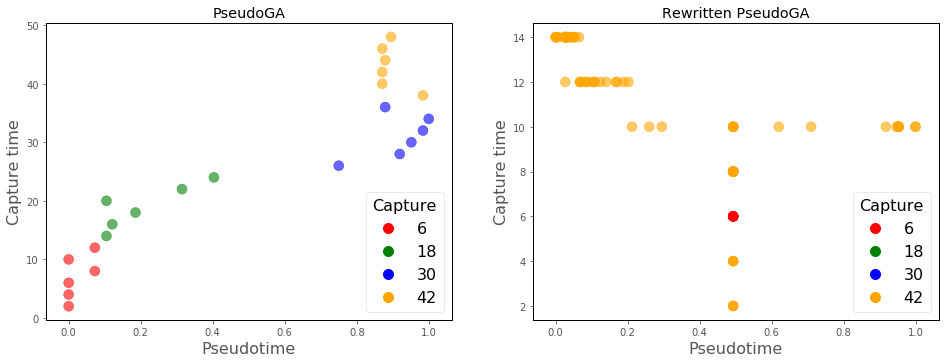

In [322]:
mdata = pd.read_csv('WindramMetaData.csv', index_col = [0])

actual_capture_time = mdata['capture.orig'].values
#print(actual_capture_time)
#pseudotime = list(Pseudotime)
#pseudotime.append(pseudotime[435])
print(pseudotime)

pseudotime_pseudoGA = [.00000000, 0.00000000, 0.00000000, 0.07258065, 0.00000000, 0.07258065, 
                       0.10483871, 0.12096774, 0.18548387, 0.10483871, 
 
0.31451613, 0.40322581, 0.75000000, 0.91935484, 0.95161290, 0.98387097, 1.00000000, 0.87903226,
                       0.98387097, 0.87096774, 

0.87096774, 0.87903226, 0.87096774, 0.89516129  ]
                        #0.926829268
pseudotime_pseudoGA = list(pseudotime_pseudoGA)
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(16, 12))
plt.subplot(2, 2, 1)
plot('PseudoGA', 'Pseudotime', 'Capture time', pseudotime_pseudoGA, actual_capture_time, mdata['capture'].values)
plt.subplot(2, 2, 2)
plot('Rewritten PseudoGA', 'Pseudotime', 'Capture time', pseudotime, typeofCells, typeofCells)

In [67]:
%matplotlib inline
#from utils import plot
from matplotlib import pyplot as plt
import seaborn as sns
#0.014925373134328358, 0.014925373134328358, 0.014925373134328358, 0.3219616204690831, 0.014925373134328358, 0.3219616204690831, 0.19402985074626866, 0.0831556503198294, 0.0, 0.19402985074626866, 0.34328358208955223, 0.2707889125799573, 0.746268656716418, 1.0, 0.8656716417910447, 0.7014925373134329, 0.7910447761194029, 0.6119402985074627, 0.7313432835820896, 0.6865671641791045, 0.6865671641791045, 0.8507462686567164, 0.6865671641791045, 0.7313432835820896
#1.0, 1.0, 1.0, 0.875, 1.0, 0.875, 0.75, 0.8611111111111112, 0.7777777777777778, 0.75, 0.4722222222222222, 0.3194444444444444, 0.3055555555555556, 0.20833333333333334, 0.18055555555555555, 0.2638888888888889, 0.1527777777777778, 0.1527777777777778, 0.0, 0.06944444444444445, 0.06944444444444445, 0.08333333333333333, 0.06944444444444445, 0.3055555555555556

In [66]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import  numpy as np
import  pandas as pd
from collections import OrderedDict
from cycler import cycler
import warnings
warnings.filterwarnings('ignore')

matplotlib.style.use('ggplot')
matplotlib.rcParams['axes.facecolor'] = 'white'
matplotlib.rcParams['axes.edgecolor'] = 'black'
# plt.rc('axes', color_cycle=['royalblue', 'orange', 'green', 'red', 'blueviolet', 'sienna', 'hotpink', 'gray', 'y', 'c'])
# plt.rc('axes', color_cycle=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y'])
plt.rc('axes', prop_cycle=cycler(color=['royalblue', 'green', 'sienna', 'c', 'orange', 'red', 'blueviolet', 'hotpink', 'gray', 'y']))
# axes.prop_cycle : cycler('color', ['b', 'g', 'r', 'c', 'm', 'y', 'k'])


def plot(title, xLabel, yLabel, xData, yData, cpt, xErr=None, **kwargs):
    plt.rcParams['axes.facecolor'] = 'white'
    plt.rcParams['axes.edgecolor'] = 'black'
    # plt.figure(figsize=(8, 6))
    plt.title( '%s' % ( title ) )
    plt.xlabel('%s' % (xLabel), fontsize=16)
    plt.ylabel('%s' % (yLabel), fontsize=16)

    cellCapture = OrderedDict((('6', 'red'), ('18', 'green'), ('30', 'blue'), ('42', 'orange')))
    color_map = [0 for i in range(len(cpt))]

    for i in range(0, len(cpt)):
        if cpt[i] == 6:
            color_map[i] = 'red'
        elif cpt[i] == 18:
            color_map[i] = 'green'
        elif cpt[i] == 30:
            color_map[i] = 'blue'
        else:
            color_map[i] = 'orange'

    if 'datset' in kwargs:
        cellCapture = OrderedDict((('0', 'red'), ('2', 'green'), ('4', 'blue'), ('7', 'orange')))
        for i in range(0, len(cpt)):
            if cpt[i] == 1:
                color_map[i] = 'red'
            elif cpt[i] == 2:
                color_map[i] = 'green'
            elif cpt[i] == 3:
                color_map[i] = 'blue'
            else:
                color_map[i] = 'orange'

    # print(cellCapture)
    markers = [plt.Line2D([0, 0], [0, 0], color=color, marker='o', ms=10, linestyle='') for color in cellCapture.values()]

    plt.scatter(xData, yData, 100, c=color_map, alpha=0.6)
    if xErr is not None:
        plt.errorbar(xData, yData, xerr=xErr, fmt='none', marker='none', ecolor=color_map)

    # l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', bbox_to_anchor=(1.1, 0.5), loc=10, fontsize=16)
    l = plt.legend(markers, cellCapture.keys(), numpoints=1, title='Capture', loc=4, fontsize=16)
    plt.setp(l.get_title(), fontsize=16)
    # plt.show()


In [ ]:
 
      0.60790364    ,,   0.95749552   ,   0.81166633       0.92892694       0.80300617       0.78369500 
,
      0.72197890     ,  0.59516225    ,  0.70047780       0.84640653       0.91618555       0.72337249 
,
      0.13298825     ,  0.57893689    ,  0.49024487       0.72058531       0.24985069       0.81873382 
,
      0.78349592     ,  0.26607605    ,  0.59974119       0.86422457       0.53663150       0.63388413 
,
      0.72526379     ,  0.85018913    ,  0.52379056       0.36950030       0.94654589       0.48467052 
,
      0.40364324     ,  0.86332869    ,  0.50437985       0.56868405       0.96993828       0.86900259 
 ,
      0.78558630     ,  0.85616166    ,  0.89289269       0.29902449       0.91986860       0.52239697 
,
      0.14642644     ,  0.94983078    ,  0.81146725       0.91409516       0.87696596       0.91309974 
,
      0.91787776     ,  0.22118256    ,  0.14572964       0.38204260       0.14543102       0.06370695 
,
      0.43380450     ,  0.07346207    ,  0.22138164       0.00000000       0.09257416       0.36064105 
,
      0.09406729     ,  0.56330878    ,  0.77075453       0.17648815       0.03981684       0.18504878 
,
      0.33704957     ,  0.69141947    ,  0.66434402       0.15040812       0.42046586       0.34590882 
,
      0.36412502     ,  0.16504081    ,  0.58510850       0.57694605       0.25184153       0.03125622 
,
      0.02010751     ,  0.08500896    ,  0.15030858       0.34023492       0.11019311       0.03344615 

      0.14314155       0.73900060     , 0.72954410       0.63965758       0.12990245       0.86322915 

      0.84381844       0.81753932       0.07605017       0.31943062       0.62821023       0.36850488 

      0.02787179       0.53483974       0.13189329       0.16892295       0.09317141       0.08918973 

      0.24576946       0.08321720       0.02209835       0.07684651       0.62950428       0.12412901 

      0.19390802       0.63925941       0.12651802       0.89488354       0.36362731       0.35516624 

      0.17111288       0.23352578       0.03324706       0.15687836       0.15618156       0.39667529 

      0.18176389       0.63049970       0.39249453       0.63796536       0.92753335       0.74805893 

      0.53971730       0.78070874       0.43151503       0.50786383       0.78757715       0.79842723 
  
      0.66633486       0.81505077       0.68086801       0.84073263       0.88074856       0.80828190 
  
      0.62154091       0.84192714       0.81216405       0.85247860       0.89657575       0.73681067 
  
      0.22994227       0.85765479       0.81325901       0.81176588       0.80430022       0.82012741 
  
      0.82838941       0.42444754       0.51065101       0.81067091       0.24586900       0.61357754 
  
      0.86521999       0.53882142       0.58510850       0.94813856       0.79235517       0.80410113 

      0.83505873       0.66613578       0.80320526       0.75253832       0.51771849       0.42106311 

      0.75861039       0.90005973       0.49880549       0.91339837       0.36014334       0.87039618 

      0.25731634       0.73253036       0.68783595       0.69420665       0.88622337       0.80380251 

      0.70893888       0.69102130       0.90414095       0.27841927       0.74109098       0.47591081 

      0.87945451       0.59784989       0.18465061       0.97601035       0.93440175       0.96247263 

      0.97282500       0.90513637       0.92783197       0.93300816       0.87786184       0.96207446 

      0.98467052       0.94435596       0.94774039       0.96794744       0.95052757       0.99781007 

      0.95918774       0.93639259       0.93221183       0.94415688       0.92524388       0.96127812 

      0.94823810       0.90165240       0.94843719       0.92793152       0.98347601       0.92394983 

      0.94435596       0.91648417       0.92813060       0.92823014       0.96665339       0.92872785 

      0.95530559       0.93828389       0.94415688       0.94744177       0.94375871       0.97073462 

      0.94793948       0.95689827       0.96028270       0.93061915       1.00000000       0.95102528 

      0.96774836       0.94555047       0.89697392       0.96247263       0.99781007       0.97133187 

      0.91120844       0.95351384       0.95550468       0.96864424       0.97680669       0.94973124 

      0.94027474       0.91608600       0.89607804       0.92962373       0.93489946       0.90871989 
      
      0.92962373       0.90931714       0.90772447       0.90573363       0.94734223       0.93131595 
      
      0.90603225       0.97302409       0.96376667       0.95779415       0.91718097       0.90623134 
      
      0.94793948       0.89577941       0.94405734       0.92912602       0.93430221       0.92215807 

      0.95341429       0.92773243       0.93042007       0.93042007       0.91349791       0.92116265 

      0.95082620       0.92156082       0.89169819       0.88572566       0.96187537       0.94166833 
      
      0.92842923       0.96227354       0.88781605       0.91140753       0.93241091       0.91827593 
      
      0.96446347       0.92365120       0.93330679       0.90434004       0.91339837       0.94256420 
      
      0.94813856       0.93211228       0.95182162       0.89727255       0.91718097       0.92514434 
      
      0.91319928       0.96506072       0.93619351       0.93649214       0.93211228       0.94226558 
       
      0.95411109 

In [378]:
COP MFOL1 MFOL2  MOL1  MOL2  MOL3  MOL4  MOL5  MOL6 NFOL1 NFOL2   OPC   PPR 
  139   353   922   401   428   494   461   835   126   217   291   310    76
my_information = {'COP': 139, 'MFOL1': 353, 'MFLO2': 922, 'MOL1': 401, 'MOL2': 428, 'MOL3': 494
                 ,'MOL4': 461, 'MOL5': 835, 'MOL6': 126, 'NFOL1': 217, 'NFOL2': 291, 'OPC': 310,
                  'PPR': 76}

Oprk1            0.000000
Rb1cc1           2.166538
Sntg1            0.000000
3110035E14Rik    1.456661
Prex2            0.000000
                   ...   
Gpt2             2.166538
Neto2            0.000000
Adcy7            0.000000
Tox3             1.456661
Ogfod1           0.000000
Name: OPC.309, Length: 2000, dtype: float64

In [ ]:
0.33101079, 0.33002944,0.29077527 ,0.15799804 0.22158979 0.21712463 0.30343474 0.20500491 0.21560353 0.09946026 
 ,
0.12041217 ,0.32831207,0.26270854 ,0.14838077 0.18253189 0.15328754 0.12178606 0.09936212 0.09239450 0.16398430 
 ,
0.17782139 ,0.17566241,0.18478901 ,0.14317959 0.09597645 0.14754661 0.21315015 0.16364082 0.18140334 0.31079490 
       ,
0.12154073 ,0.16957802,0.25171737 ,0.33420020 0.27512267 0.13670265 0.13886163 0.27791953 0.49003925 0.16943081 
 ,
0.21084396 ,0.69705594,0.17168793 ,0.06153091 0.16957802 0.39352306 0.36261040 0.10063788 0.13233562 0.15893032 
 ,
0.09578018 ,0.21064769,0.16418057 ,0.20000000 0.23989205 0.20525025 0.33915604 0.24425908 0.35431796 0.14563297 
 ,
0.30132483 ,0.23827282,0.40009814 ,0.22158979 0.14700687 0.50201178 0.41805692 0.22463199 0.21324828 0.27762512 
 ,
0.18542689 ,0.15893032,0.17841021 ,0.69313052 0.08788027 0.12963690 0.26413150 0.27262022 0.11393523 0.29072620 
,
0.25127576 ,0.10166830,0.12389598 ,0.18665358 0.21540726 0.15225711 0.14798822 0.18012758 0.23645731 0.13542689 
  
0.19367026 ,0.26251227,0.15981354 0.18400393 0.39411187 0.28802748 0.31864573 0.35868499 0.23675172 0.12978410 
       
0.24430815 ,0.17585868,0.25368008 0.56766438 0.33061825 0.22477920 0.23586850 0.47016683 0.20834151 0.17948970 
    
0.17914622, 0.55475957, 0.25441609 0.31854760 0.26216879 0.13312071 0.29612365 0.29072620 0.30691855 0.21854760 
       
0.24214917 0.24357213 0.28616290 0.43037291 0.19303238 0.25309127 0.28199215 0.24052993 0.22453386 0.30961727 
      
0.31722277 0.32168793 0.20745829 0.13537782 0.11943081 0.21795878 0.19798822 0.55441609 0.29661433 0.23763494 
    
0.29028459 0.36005888 0.34862610 0.24043180 0.49906771 0.28405299 0.40574092 0.23699706 0.39048086 0.07168793 
     
0.18640824 0.31835132 0.21687929 0.21952895 0.20981354 0.32266928 0.25456330 0.19602552 0.14735034 0.19249264 
     
0.20618253 0.21481845 0.30888126 0.23866536 0.30029441 0.14092247 0.18508342 0.30073602 0.37119725 0.96653582 
    
0.12561335 0.94955839 0.94244357 0.11923454 0.13424926 0.92001963 0.16928361 0.16025515 0.10883219 0.91830226 
      
0.94479882 0.11045142 0.97144259 0.10789990 0.15225711 0.09769382 0.11781158 0.08410206 0.07674190 0.10471050 
     
0.95088322 0.95731109 0.97419038 0.17477920 0.10721295 0.91653582 0.66113837 0.03066732 0.94916585 0.96133464 
     
0.12409225 0.95132483 0.08645731 0.15176644 0.11879293 0.12948970 0.94033366 0.87639843 0.93611384 0.94445535 
      
0.94936212 0.14646712 0.13856722 0.10731109 0.95721295 0.92129539 0.09597645 0.12998037 0.09494603 0.14558391 
      
0.81148184 0.95245339 0.88140334 0.11054956 0.79995093 0.94347399 0.11241413 0.13670265 0.10446516 0.94744848 
    
0.98287537 0.94651619 0.15201178 0.12468106 0.12011776 0.93783121 0.12320903 0.82477920 0.81579980 0.14553484 
      
0.94779195 0.24946026 0.93434740 0.92782139 0.12615309 0.93822375 0.10628067 0.88994112 0.13346418 0.95652601 
 
0.84950932 0.84185476 0.93665358 0.93832188 0.93537782 0.10225711 0.81153091 0.92571148 0.95780177 0.93719333 
   
0.25451423 0.89337586 0.94367026 0.15711482 0.93616290 0.86830226 0.91786065 0.16418057 0.93223749 0.94156035 
    
0.13410206 0.10397448 0.96108930 0.85215898 0.92953876 0.63626104 0.19656526 0.87345437 0.13415113 0.93851816 
    
0.08743867 0.13945044 0.02615309 0.29666340 0.06766438 0.91408243 0.04916585 0.98238469 0.11000981 0.95397448 
     
0.07816487 0.95250245 0.95677134 0.93405299 0.95461237 0.96010795 0.97242395 0.94774289 0.11614328 0.14582924 
     
0.14121688 0.95299313 0.91599607 0.00000000 0.93969578 0.94210010 0.94465162 0.93444553 0.94268891 0.98498528 
      
0.94470069 0.92065751 0.95603533 0.94033366 0.94705594 0.95706575 0.94489696 0.08361138 0.07433759 0.07860648 
      
0.09391560 0.89048086 0.95897939 0.93596663 0.94445535 0.95137390 0.97664377 0.95569185 0.95044161 0.96123651 
   
0.11854760 0.96025515 0.10333660 0.10309127 0.93307164 0.96810599 0.95976447 0.96511286 0.96800785 0.98778214 
    
0.94528950 0.08846909 0.21879293 0.95412169 0.94234544 0.95471050 0.96452404 0.96246320 0.96727184 0.96840039 
     
0.92767419 0.93213935 0.99833170 0.94965653 0.96658489 0.14018646 0.96898921 0.97227674 1.00000000 0.03900883 
     
0.07404318 0.09170756 0.04558391 0.07144259 0.09528950 0.10726202 0.98194308 0.04990186 0.94156035 0.15372915 
      
0.13788027 0.94484789 0.95902846 0.94043180 0.97880275 0.89995093 0.97016683 0.95996075 0.94975466 0.96535819 
      
0.95613346 0.95068695 0.95505397 0.88189401 0.97473013 0.05142296 0.99857704 0.06913641 0.93444553 0.06776251 
    
0.94735034 0.06202159 0.96005888 0.95907753 0.10471050 0.97203140 0.97826300 0.95117763 0.98949951 0.92276742 
       
0.15569185 0.07330716 0.96624141 0.09862610 0.08238469 0.06472031 0.16133464 0.11746811 0.12021590 0.91741904 
      
0.93743867 0.88434740 0.91992149 0.71138371 0.65446516 0.09263984 0.11182532 0.15667321 0.14111874 0.08508342 
    
0.13846909 0.10475957 0.16216879 0.17355250 0.10520118 0.06511286 0.05652601 0.03135427 0.14092247 0.08164868 
      
0.08420020 0.10637880 0.92899902 0.96368989 0.96957802 0.95112856 0.96364082 